# Predicting the price of a house using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting the price of a house using data about other sold houses attributes

## 1. Problem definition

From kaggle:
* **It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.**

## 2. Data

The data is downloaded from Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques.

There are 2 datasets, one for training and one for predicting the submission prices.

## 3. Evaluation

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## 4. Features

Kaggle offers a list of description for data:

Here's a brief version of what you'll find in the data description file:

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

### Importing all the tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from catboost import CatBoostRegressor 
from lightgbm import LGBMRegressor

### Loading the data

In [44]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### EDA / Data Analisys

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df_test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [7]:
len(df_train.LotFrontage)

1460

In [8]:
259/1460

0.1773972602739726

In [45]:
df_train.drop("Id", axis=1, inplace=True)
df_test.drop("Id", axis=1, inplace=True)

In [10]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


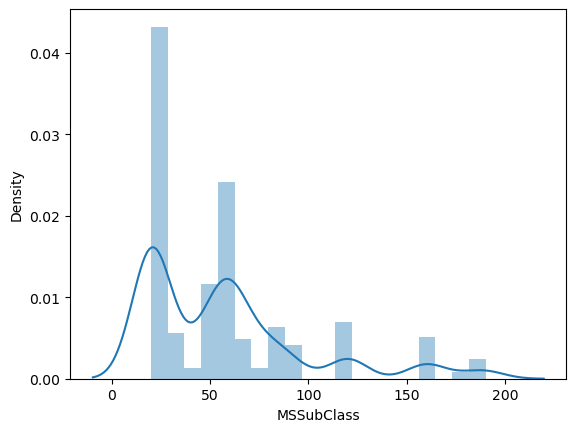

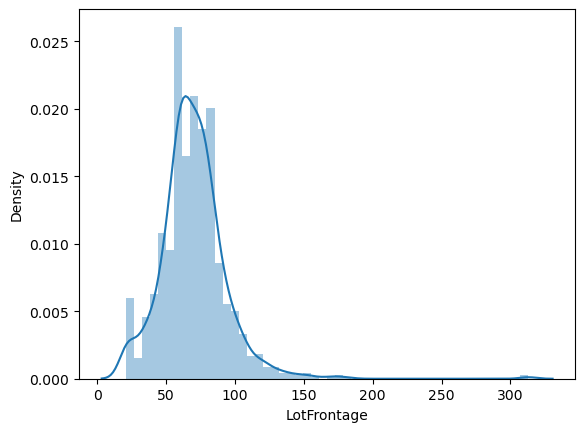

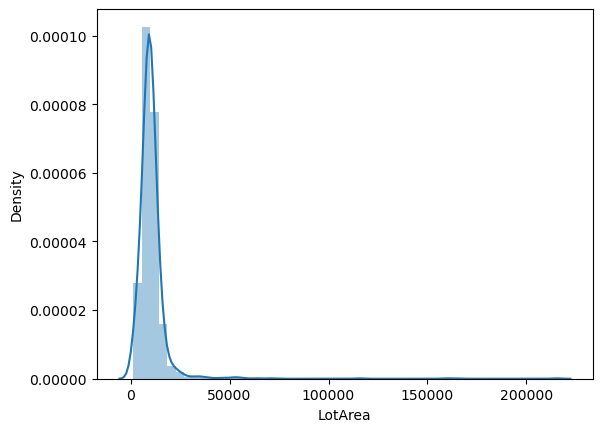

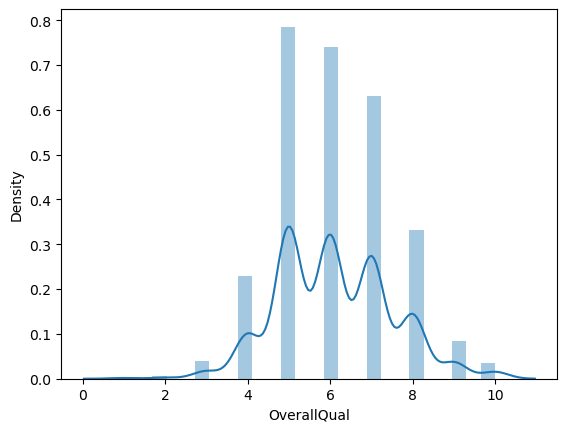

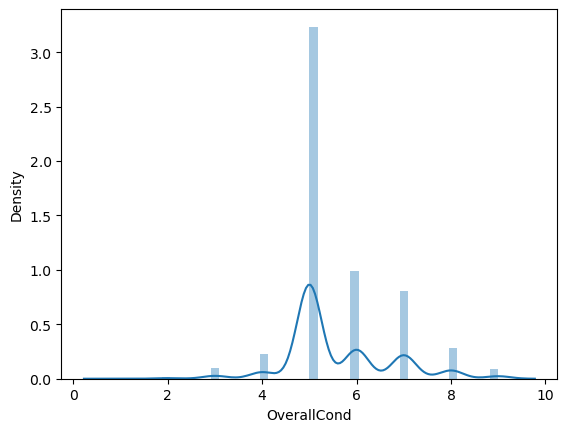

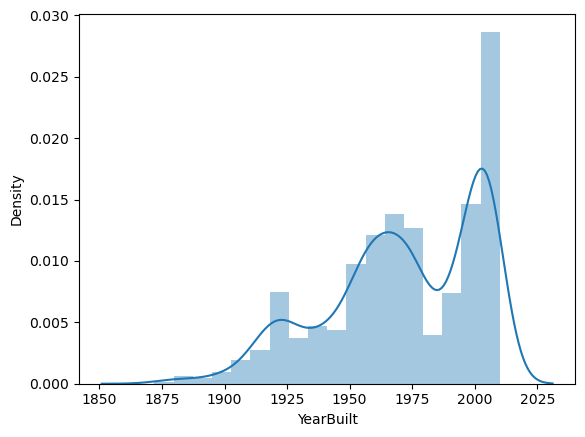

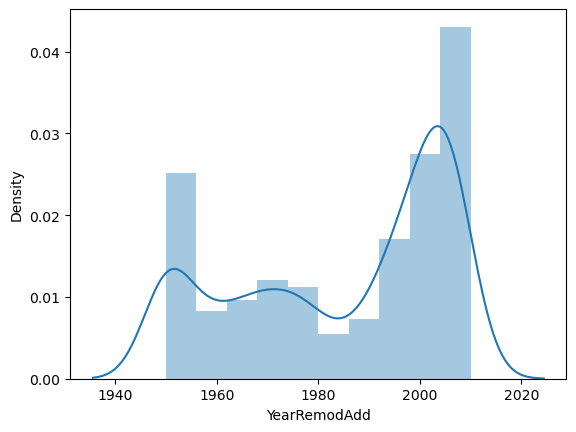

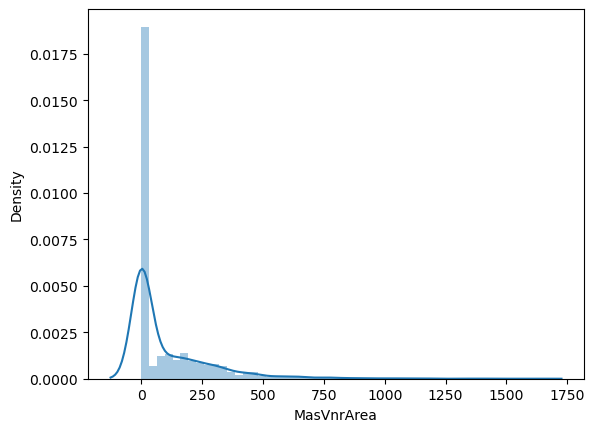

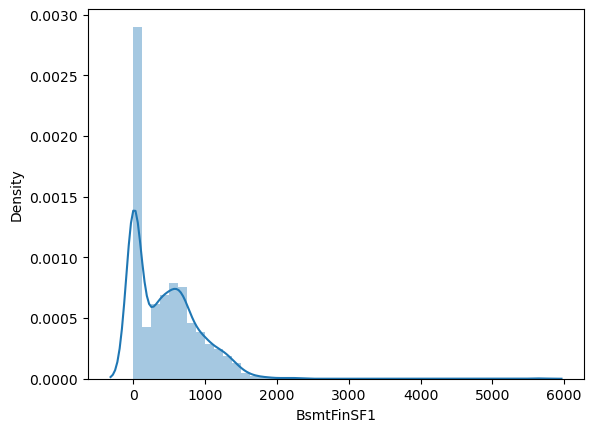

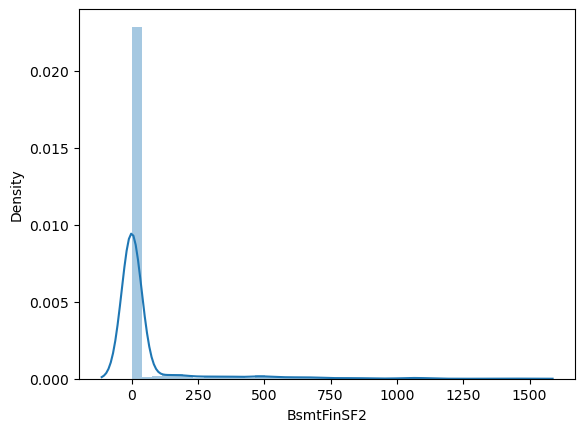

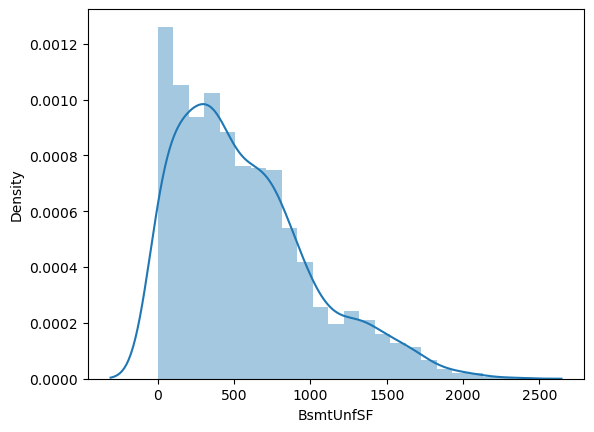

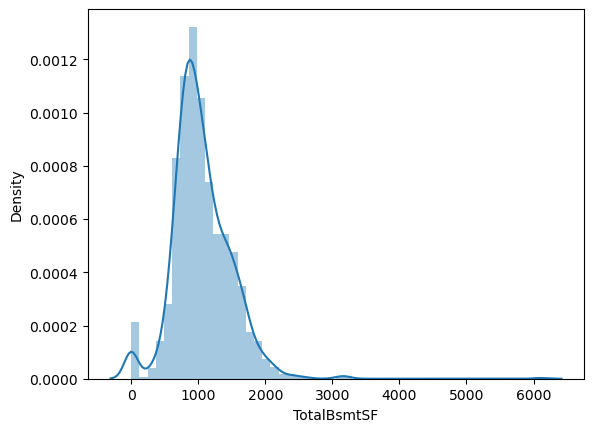

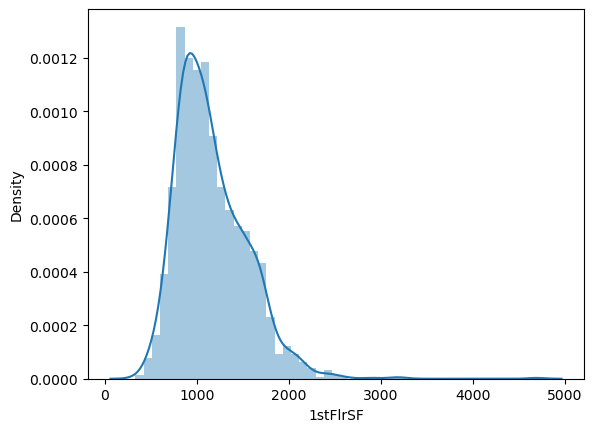

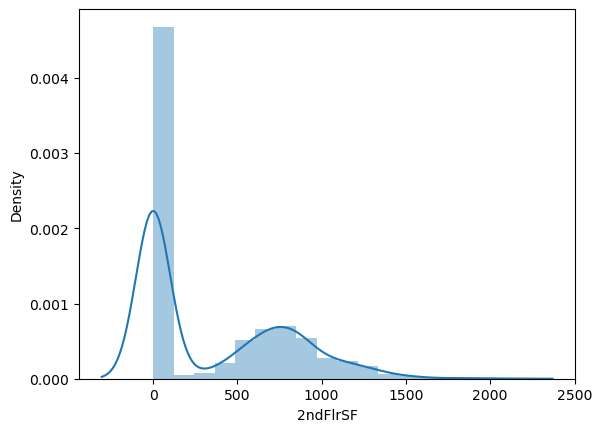

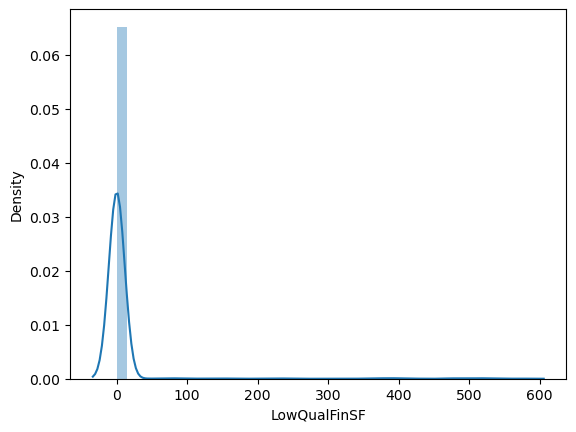

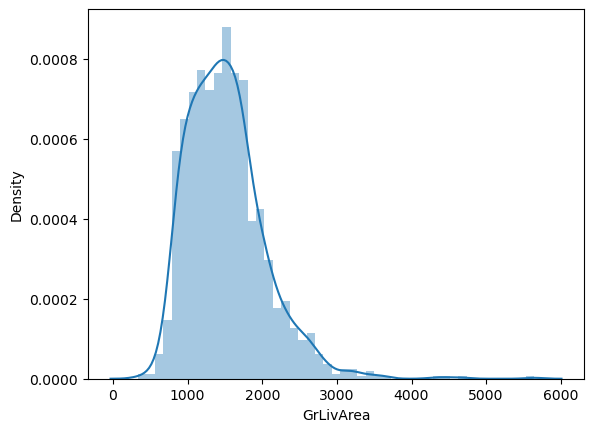

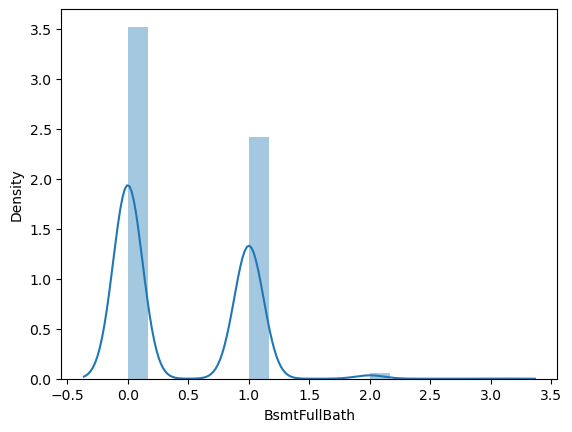

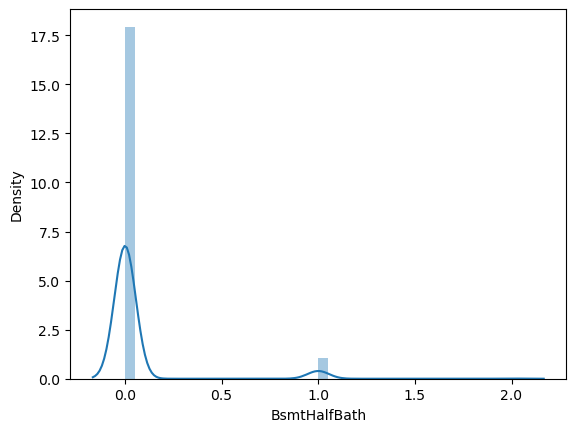

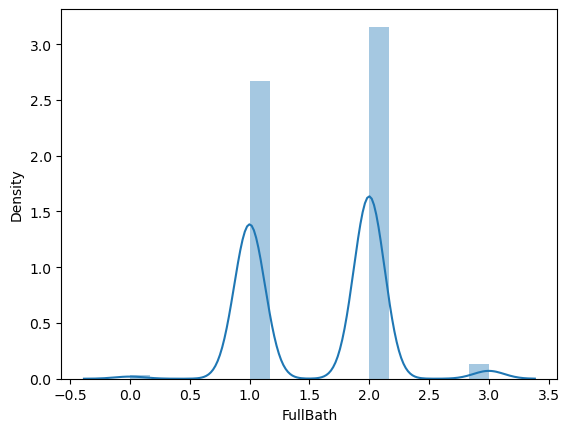

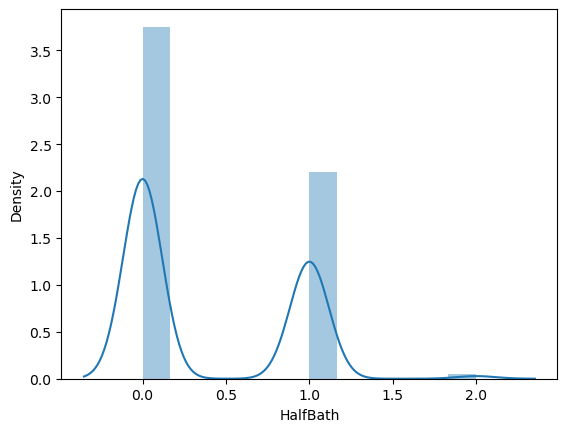

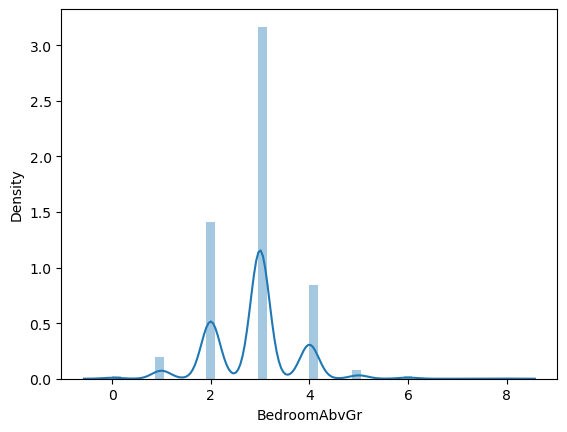

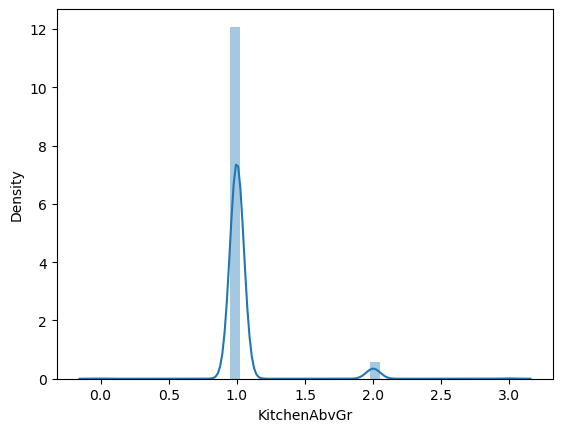

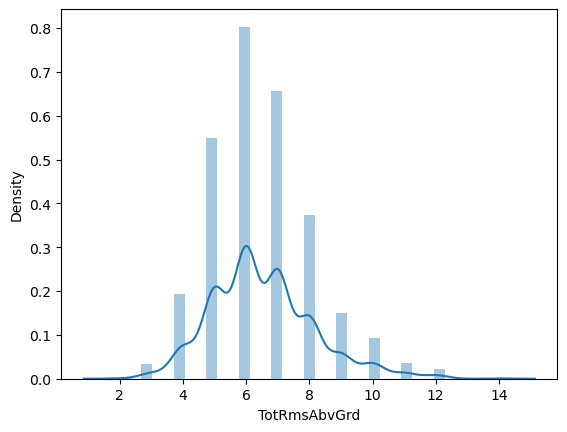

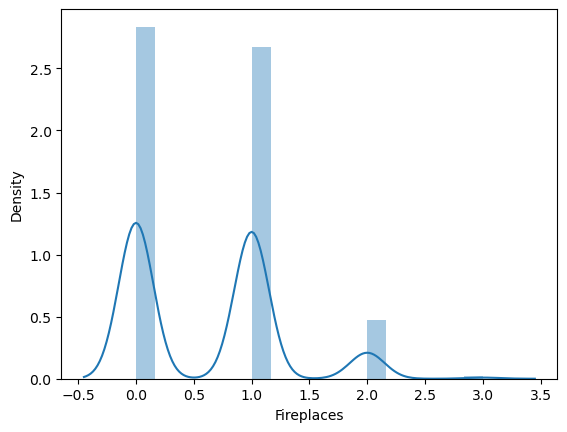

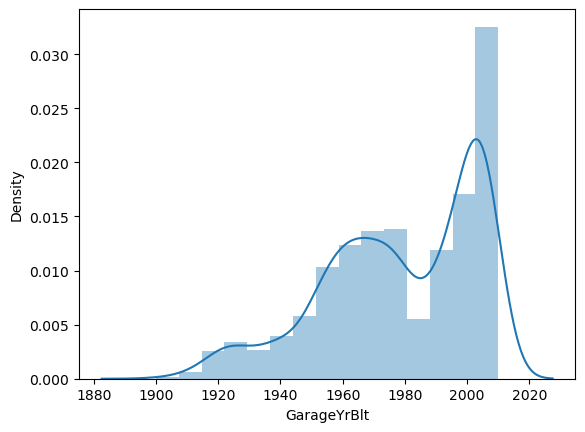

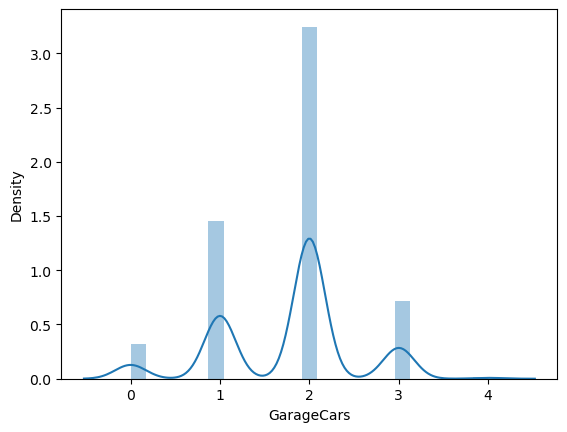

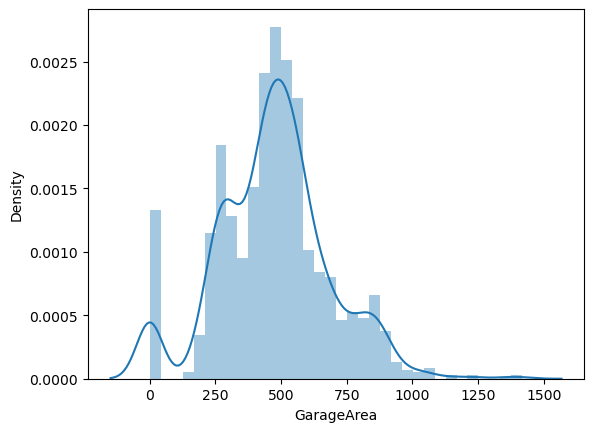

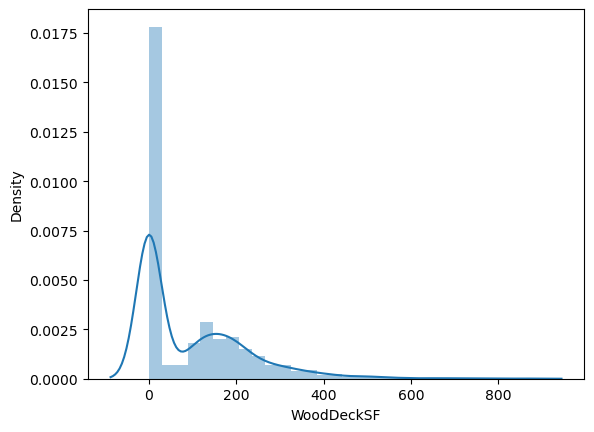

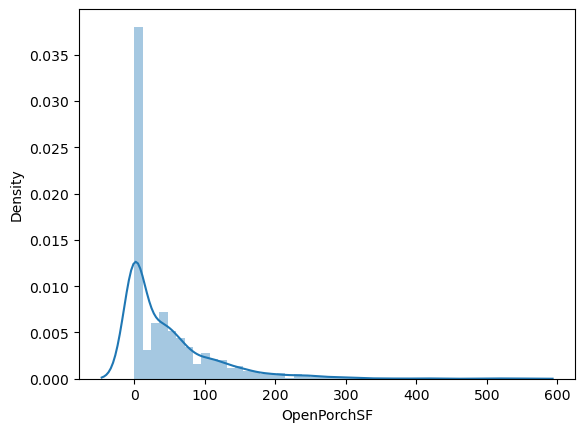

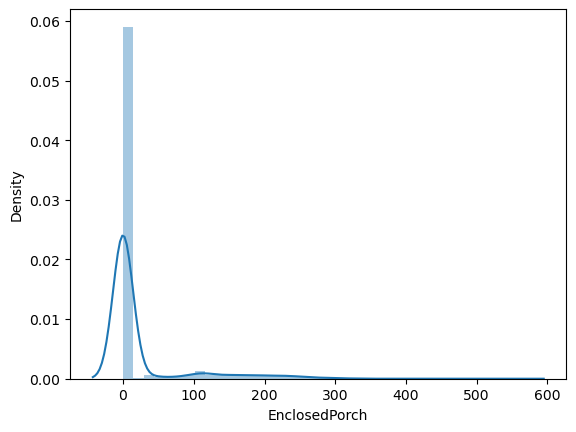

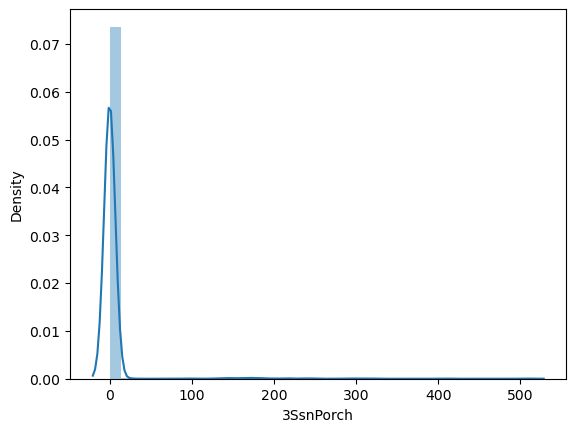

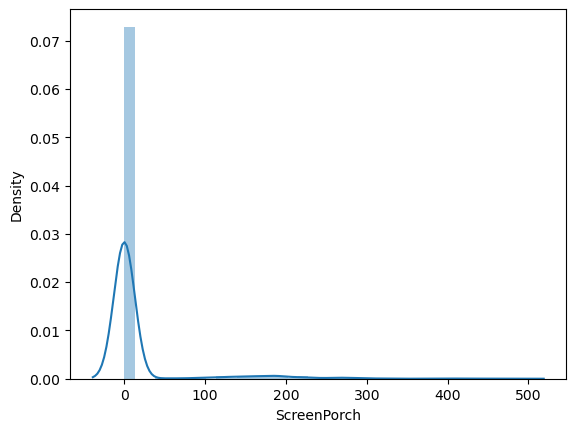

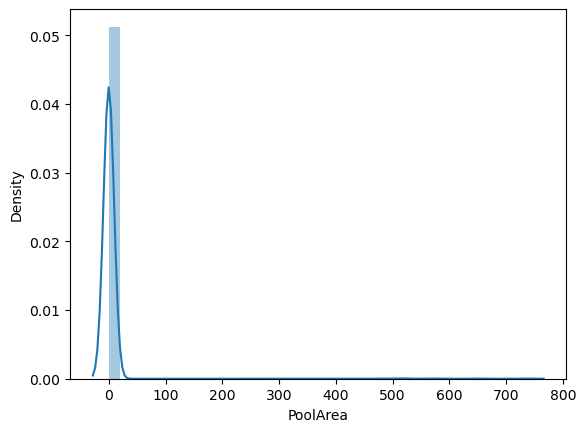

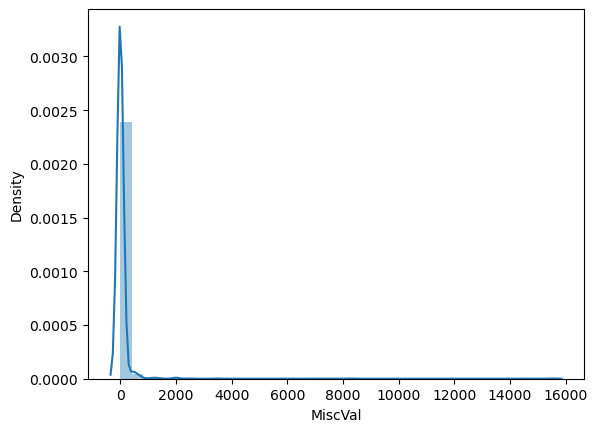

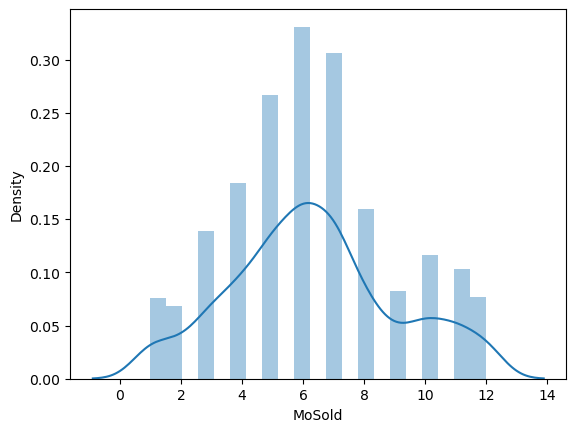

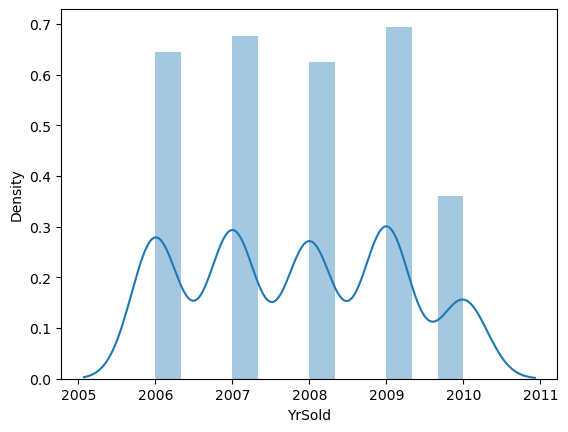

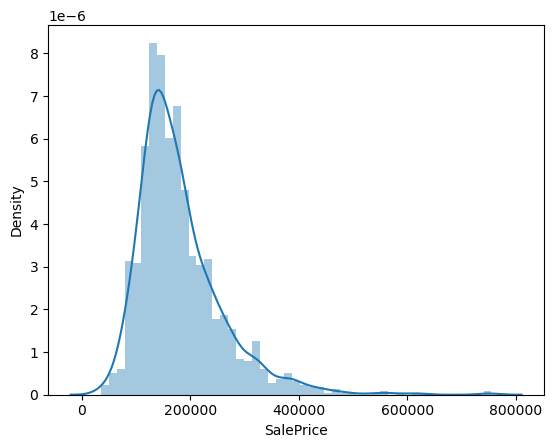

In [11]:
for col in df_train:
    if df_train[col].dtype != 'O':
        sns.distplot(df_train[col])
        plt.show()

I identified some variables that have some outliers which i would settle using quantile, but i will do it after the data analisys

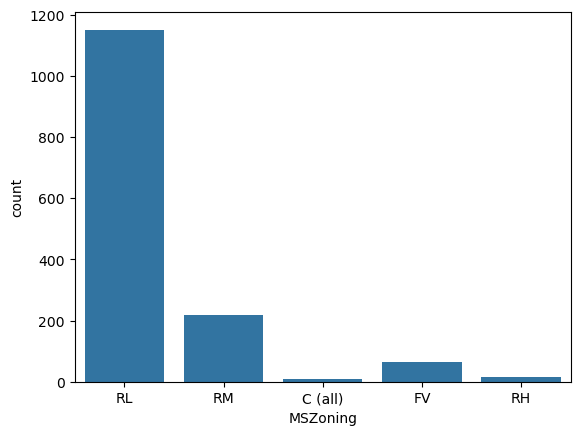

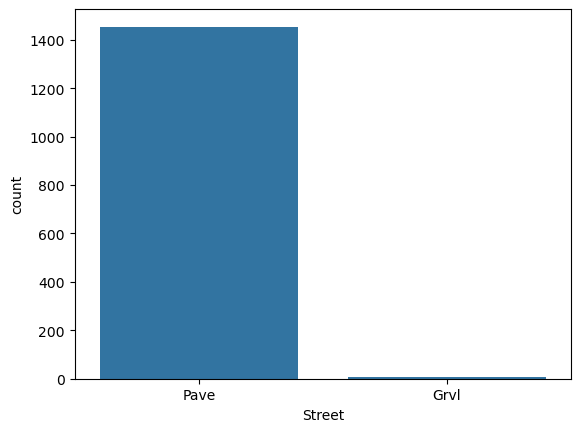

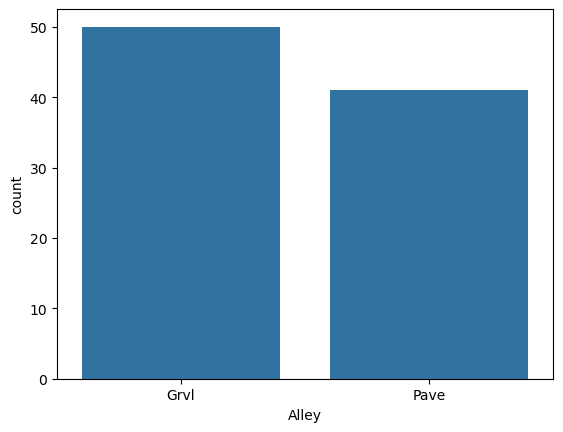

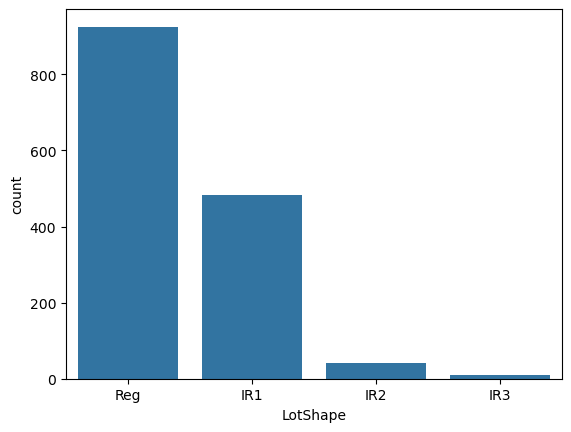

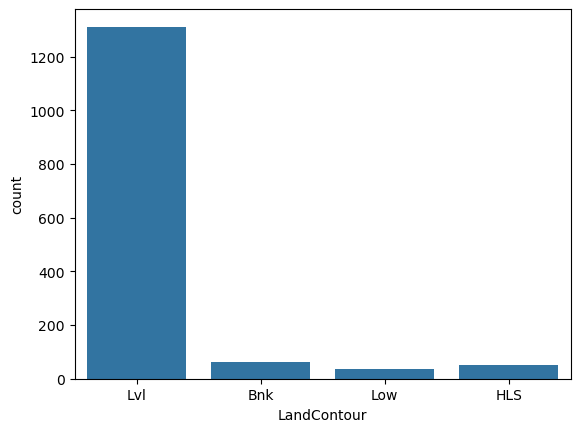

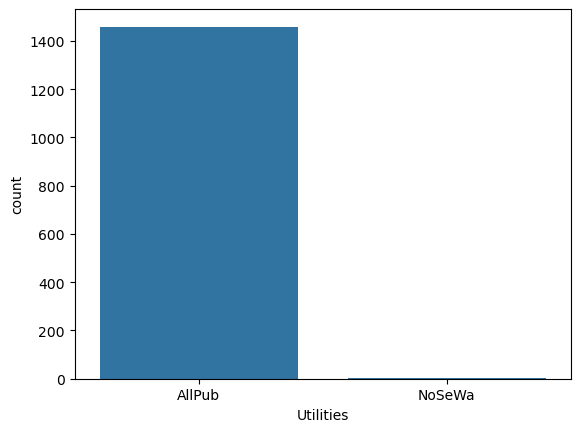

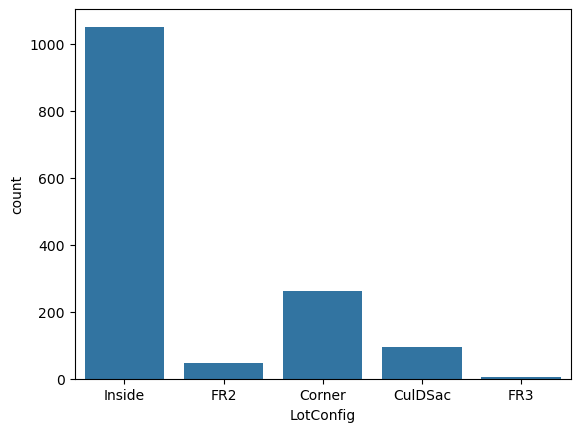

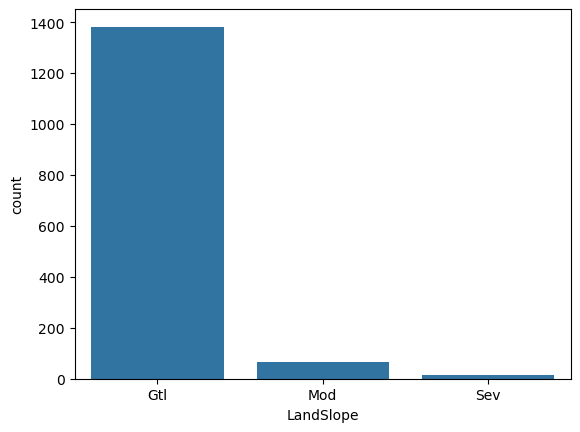

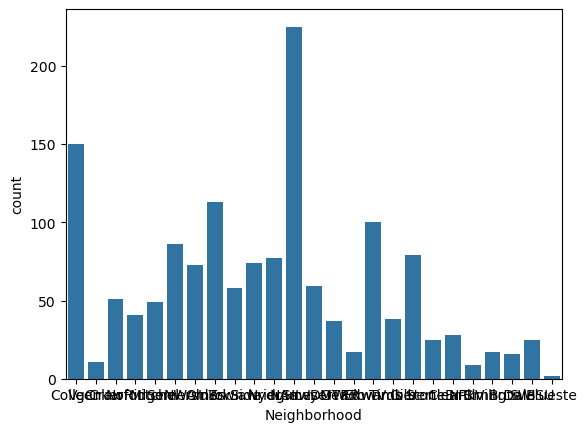

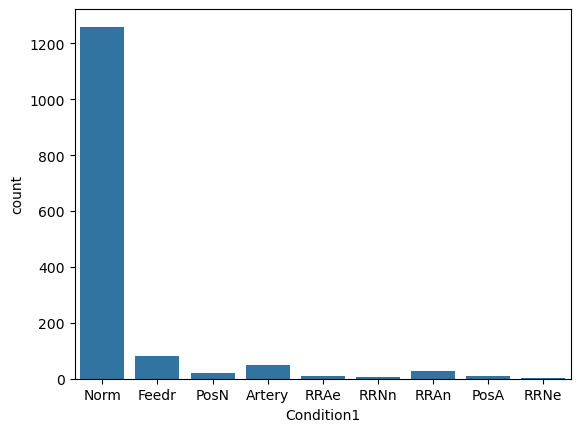

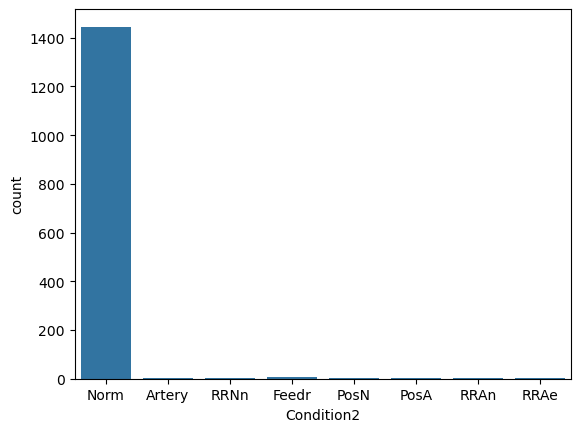

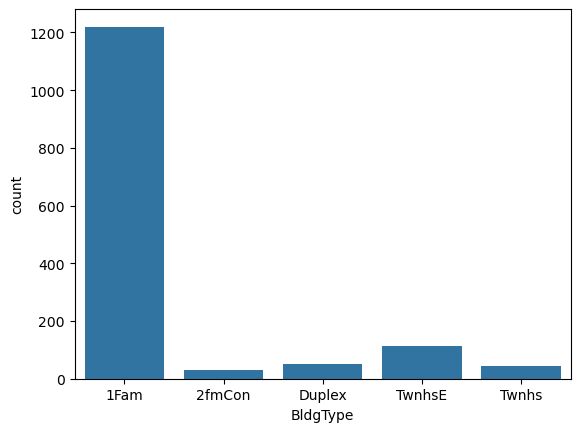

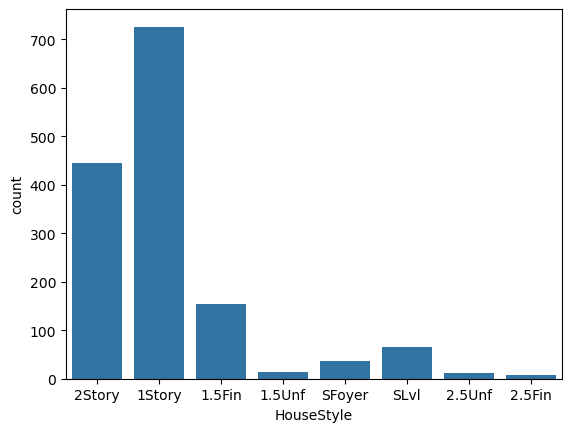

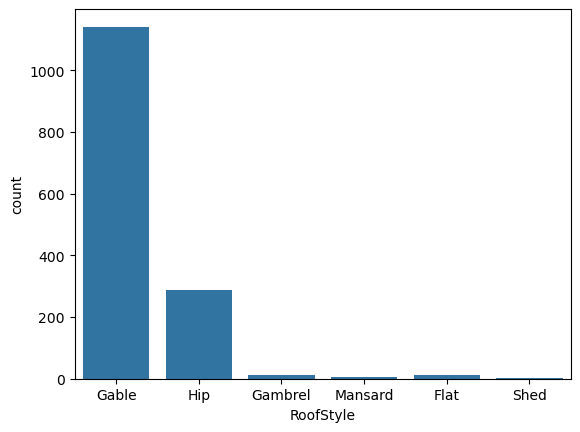

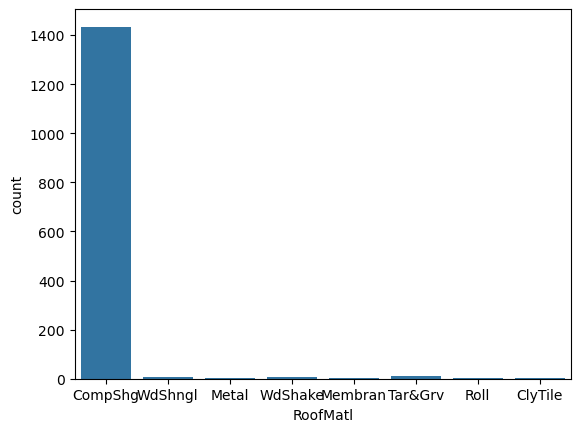

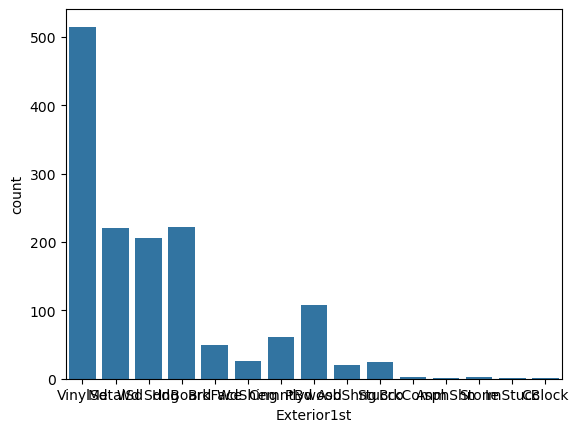

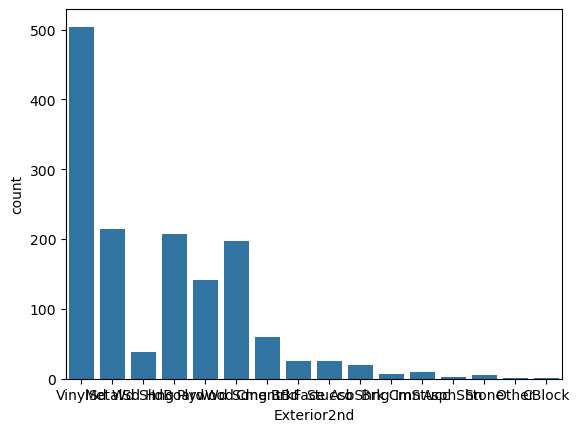

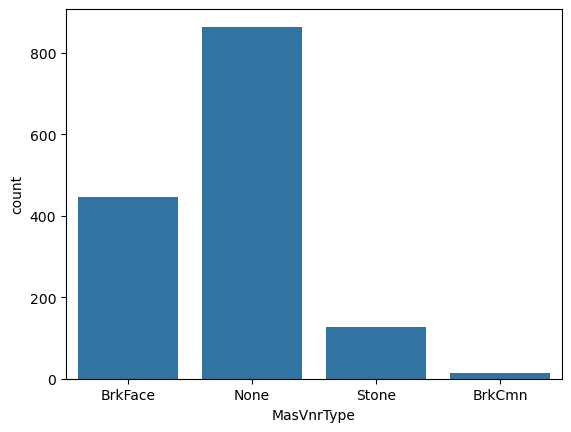

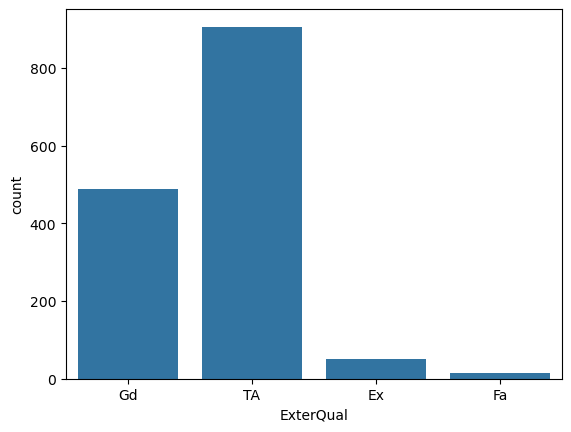

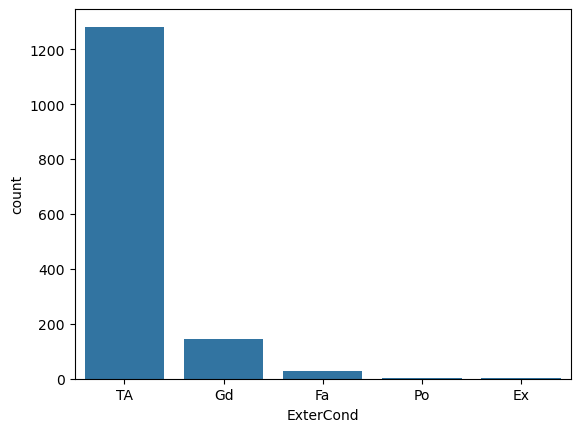

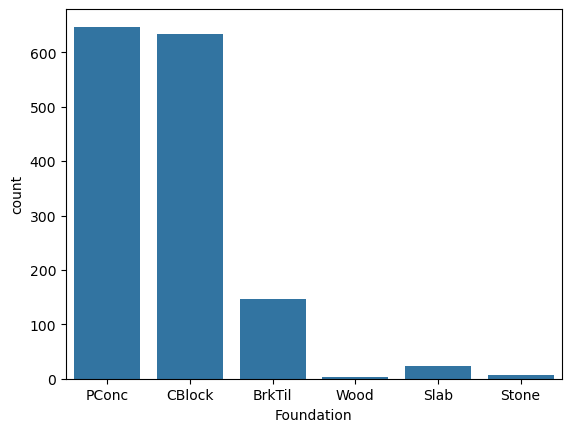

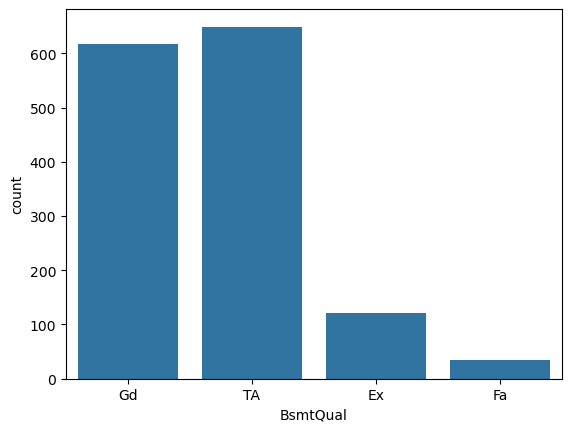

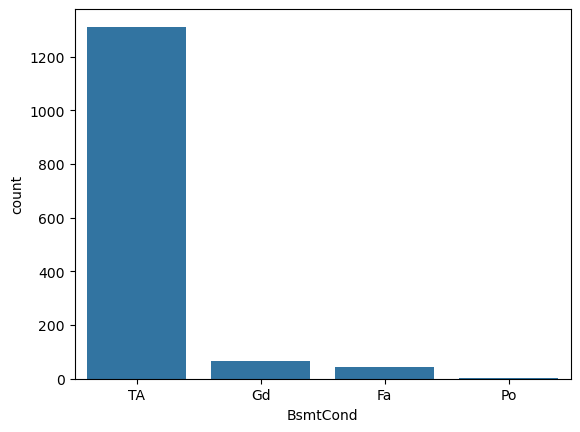

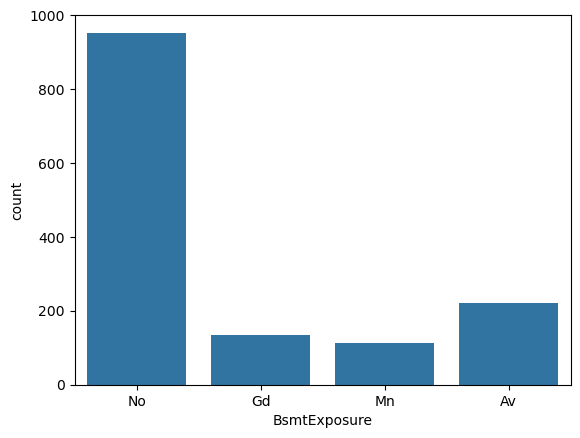

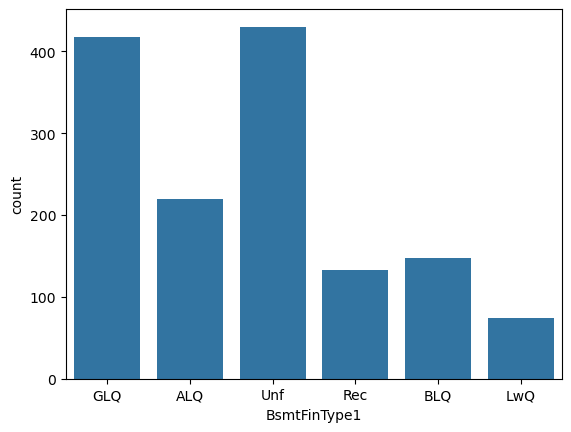

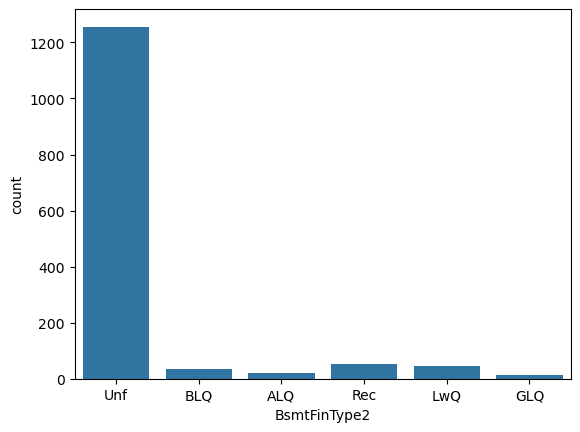

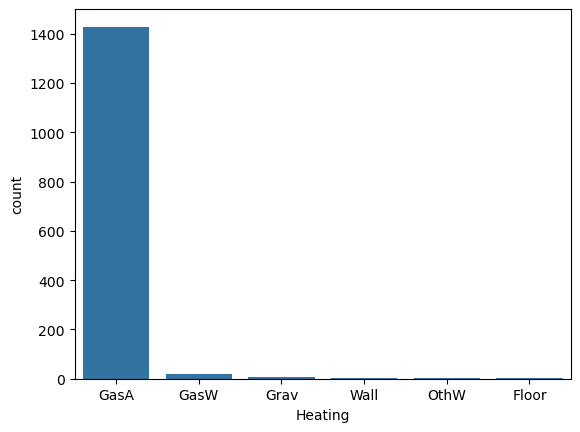

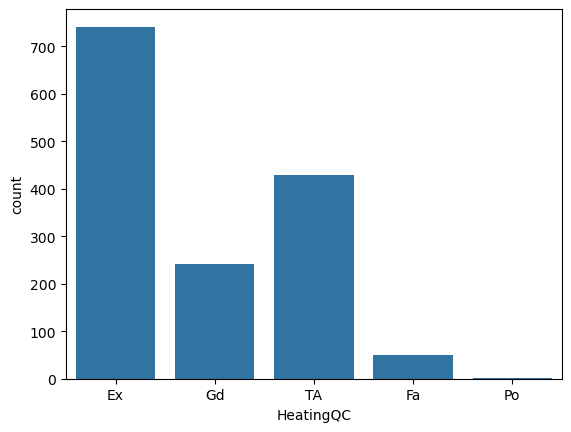

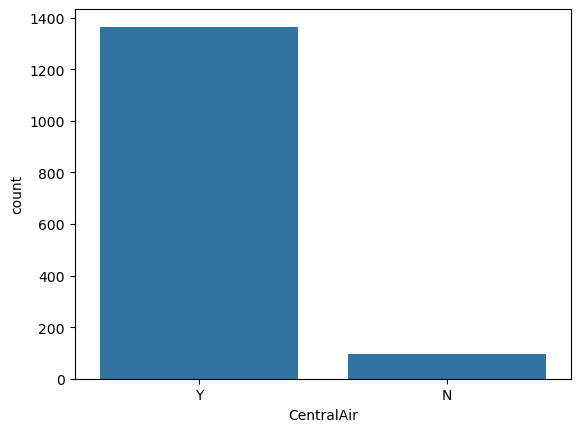

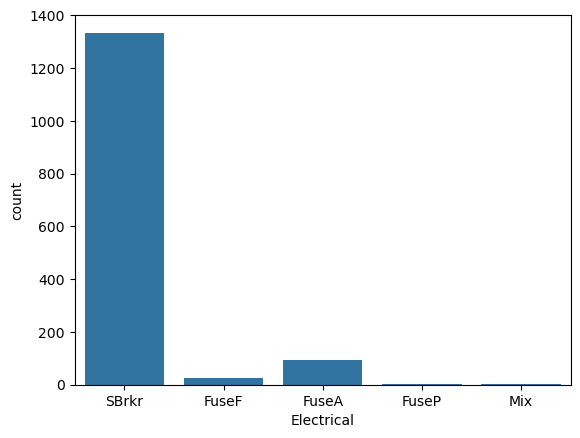

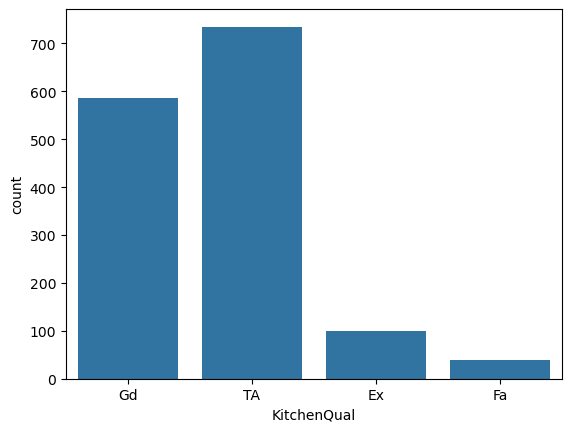

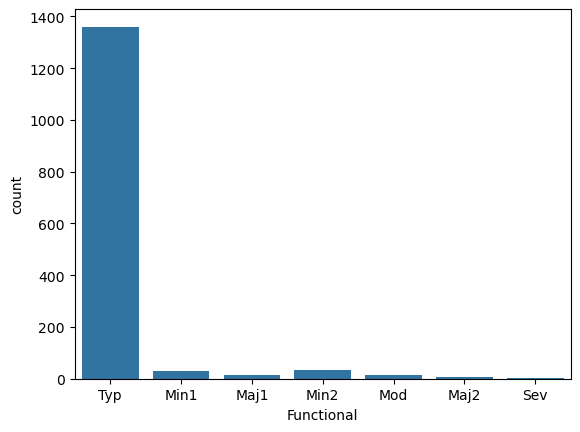

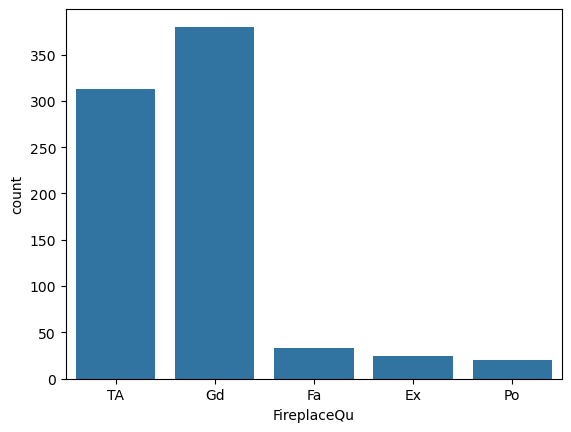

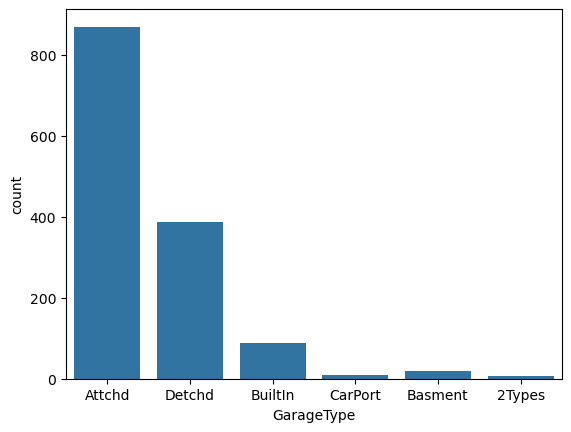

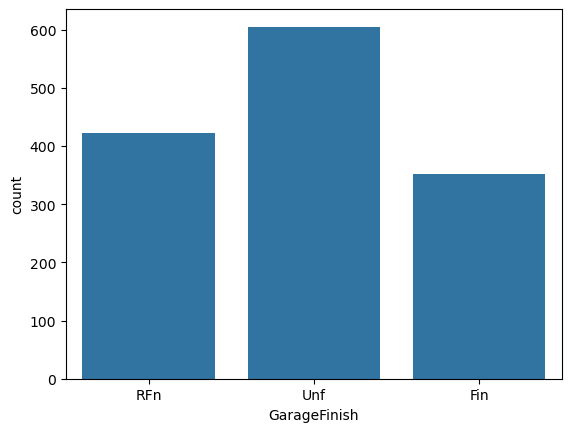

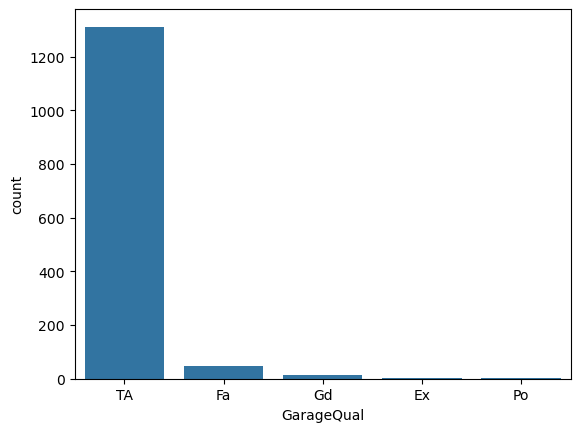

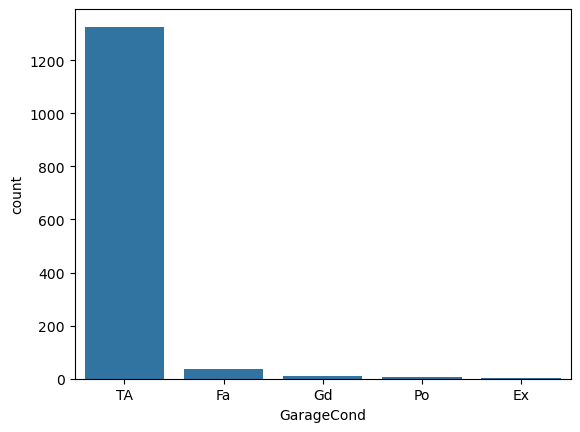

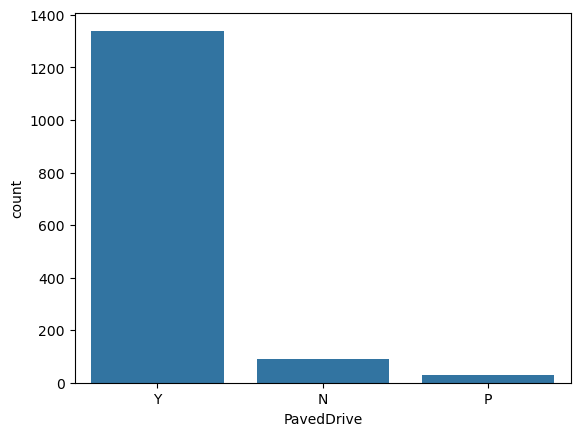

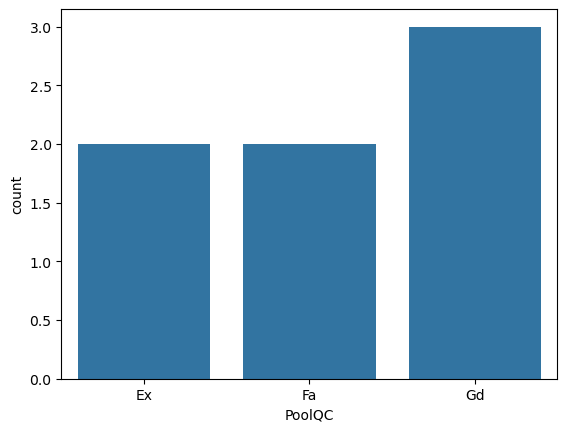

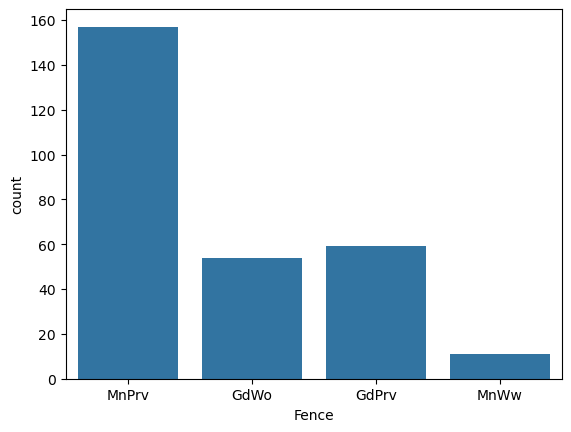

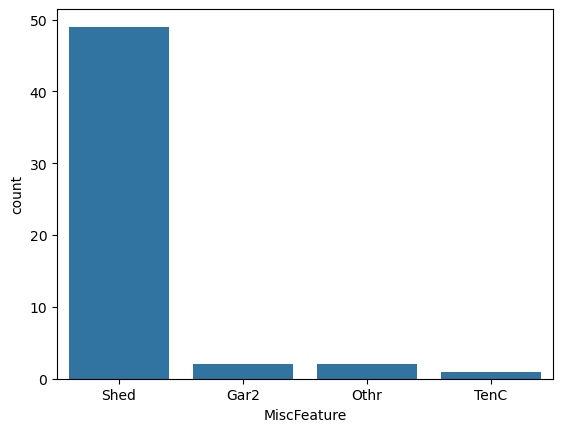

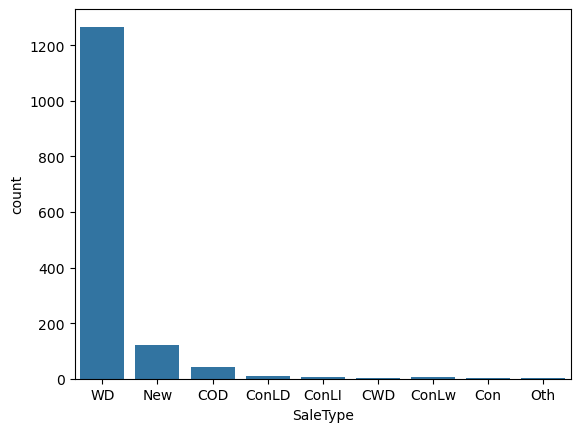

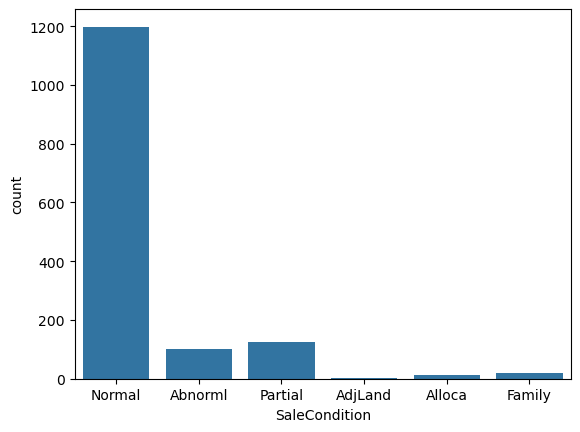

In [12]:
for col in df_train:
    if df_train[col].dtype == 'O':
        sns.countplot(x=col,data=df_train)
        plt.show()

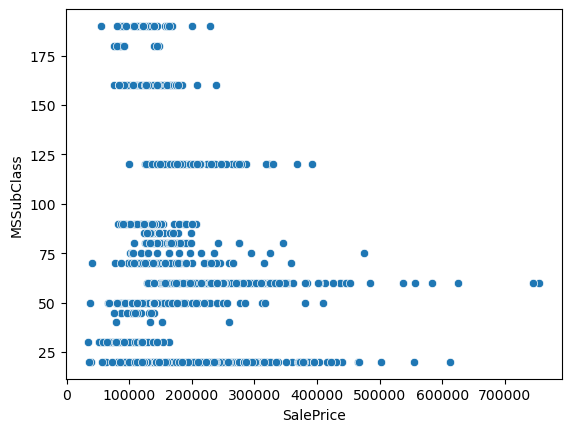

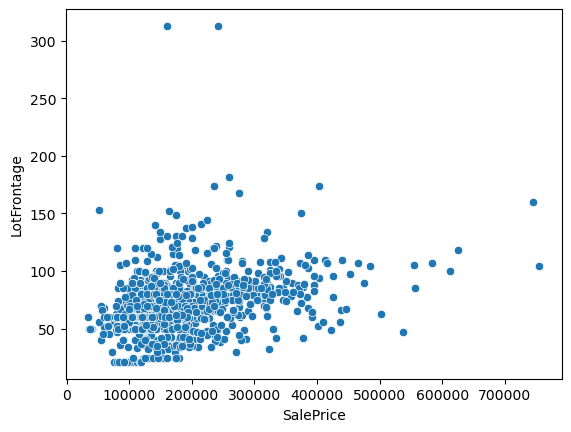

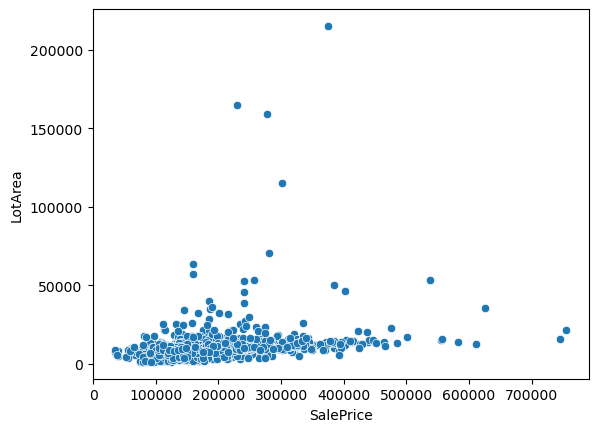

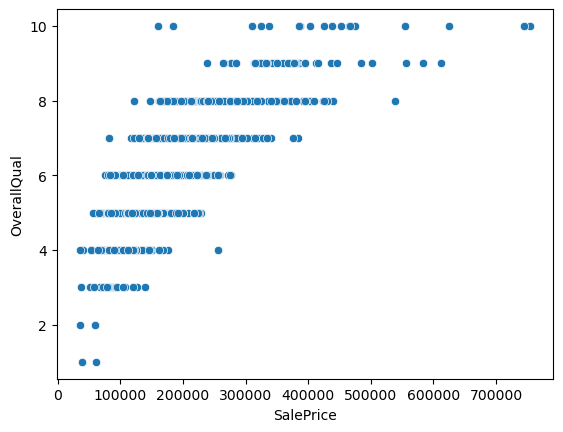

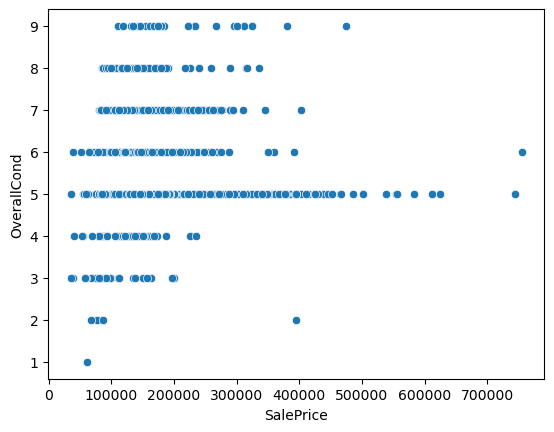

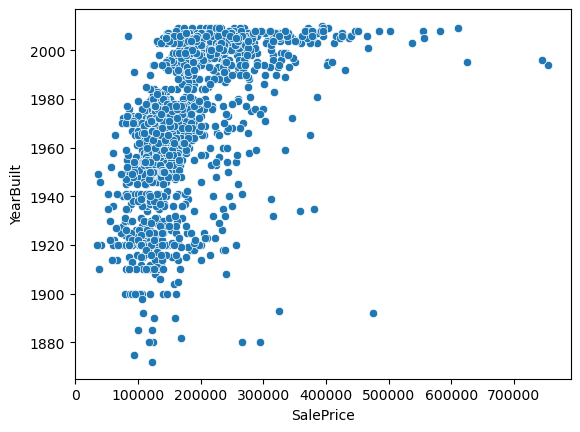

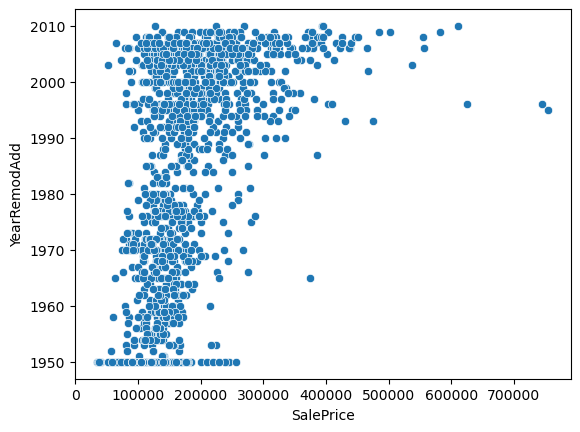

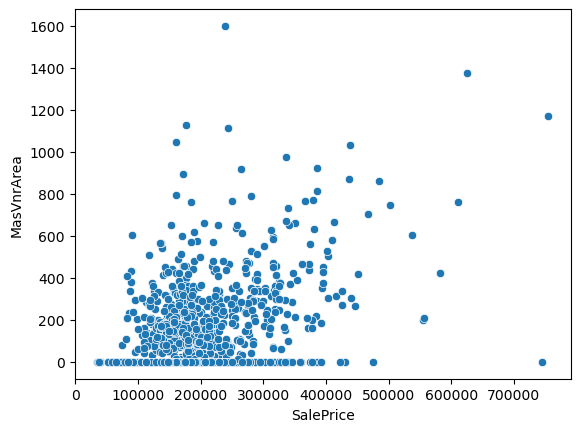

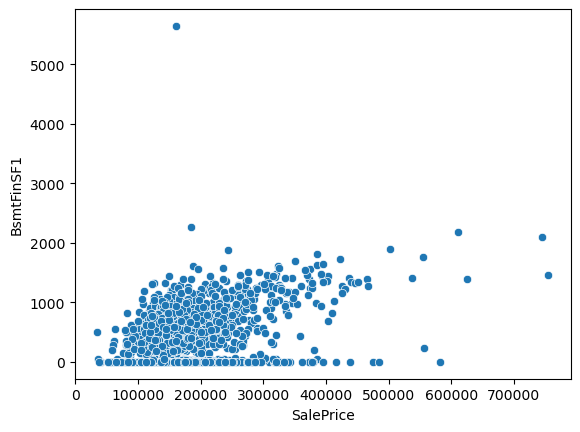

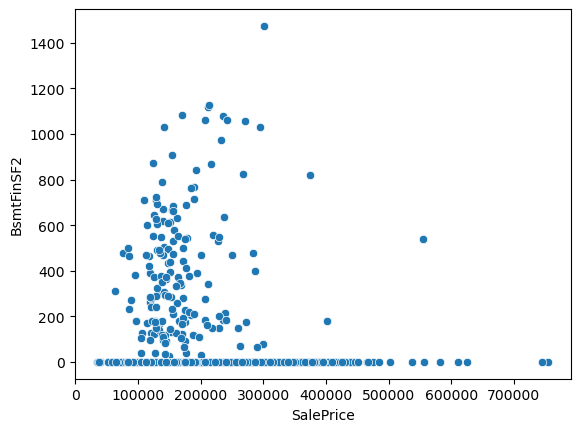

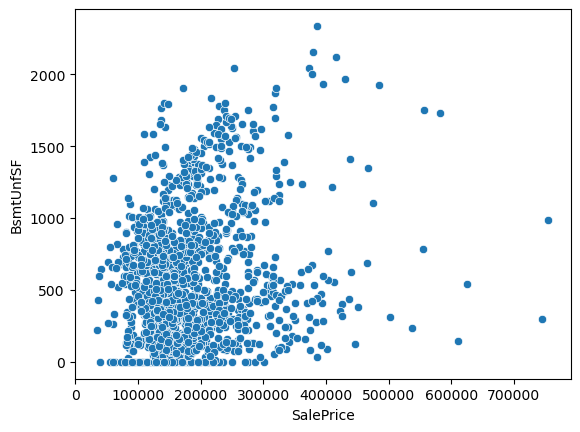

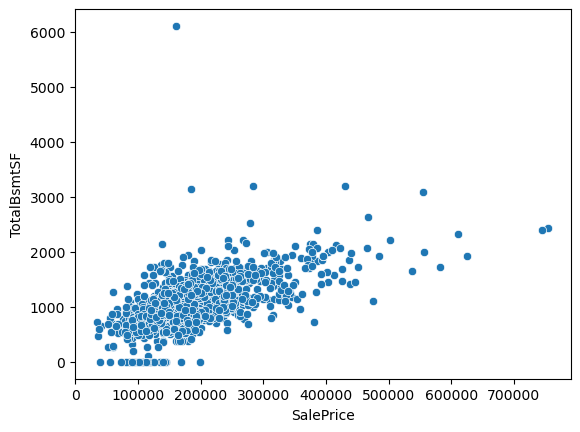

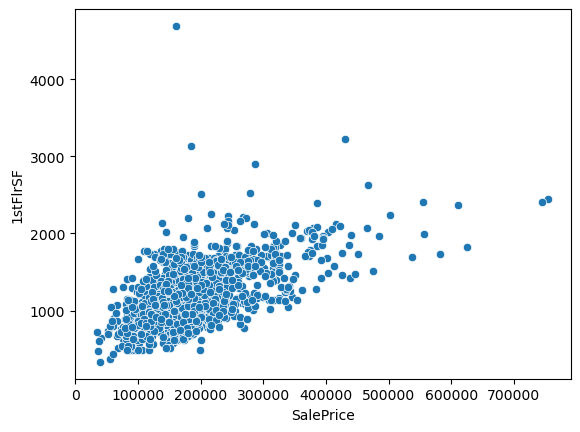

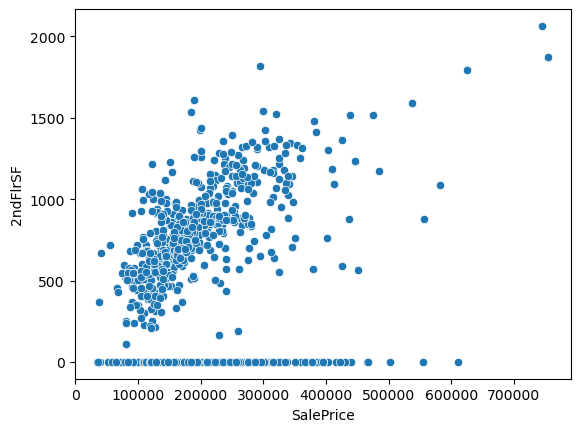

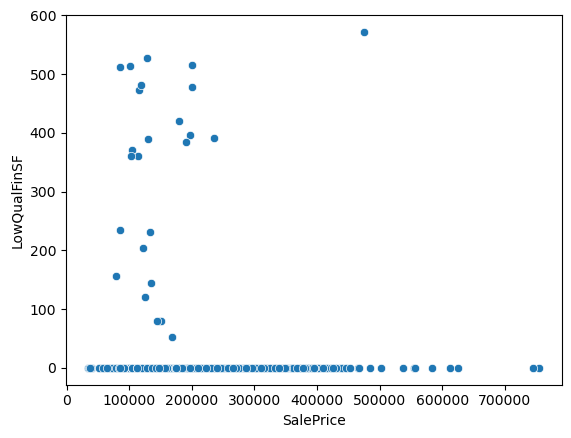

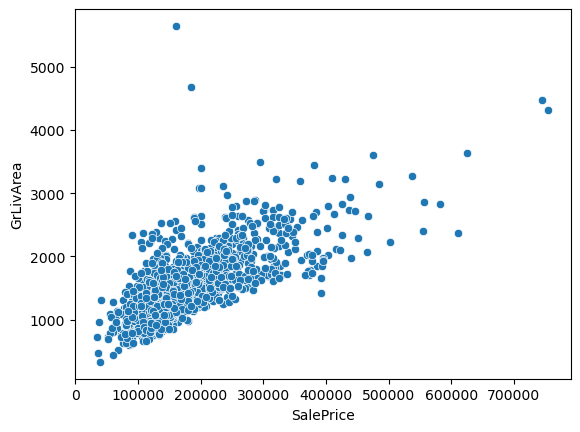

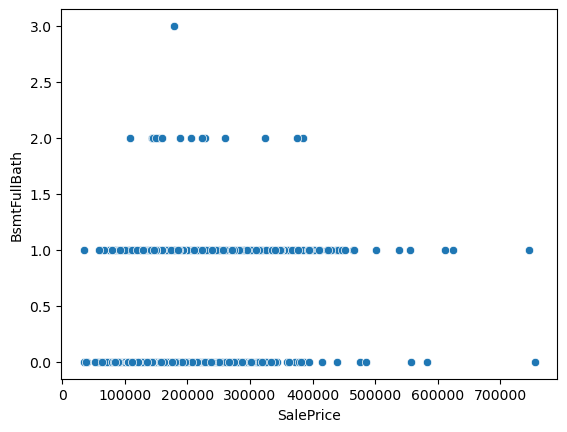

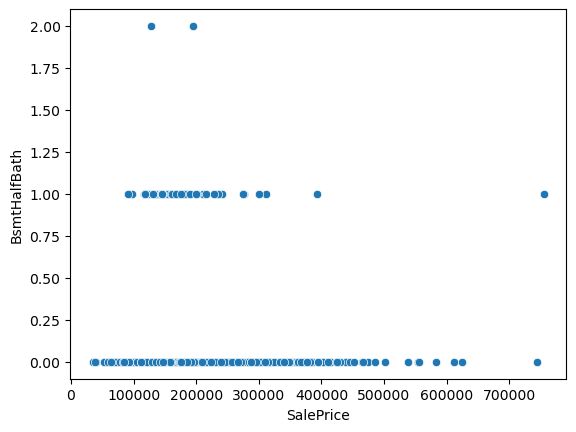

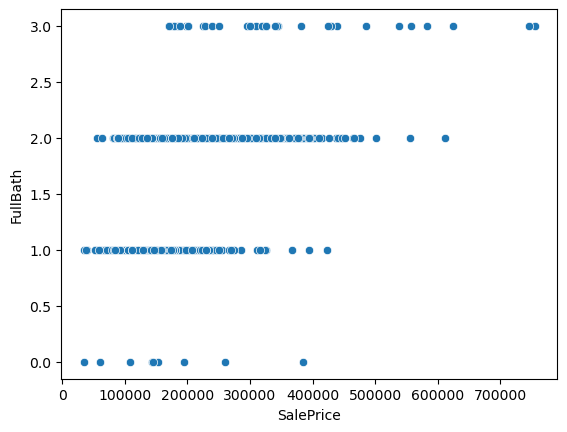

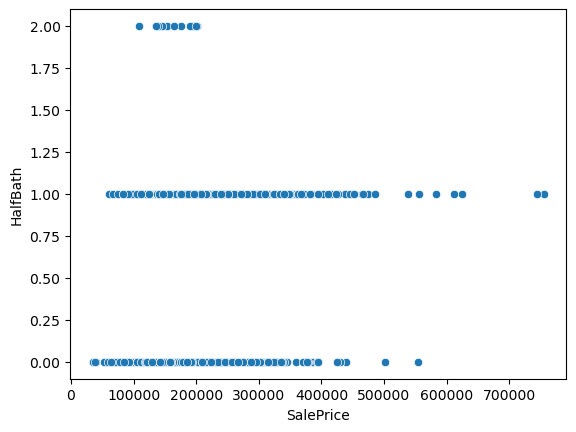

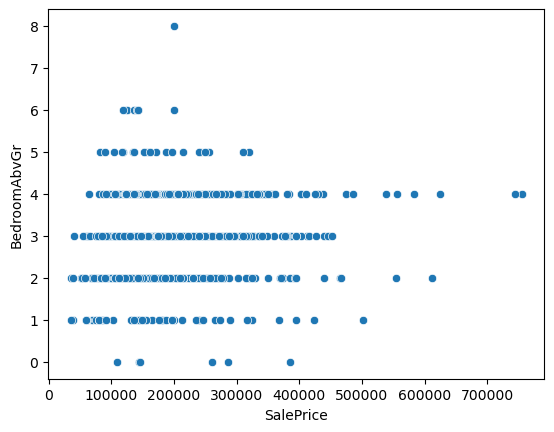

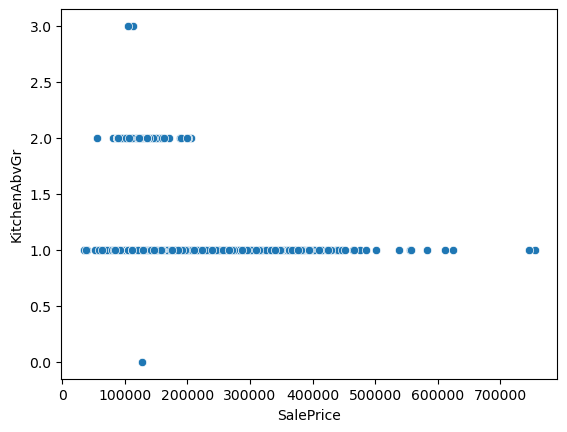

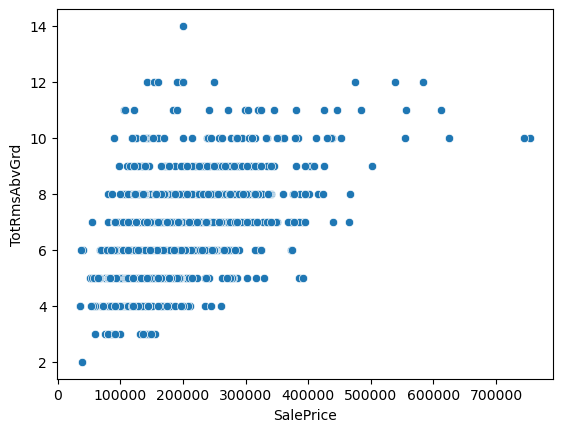

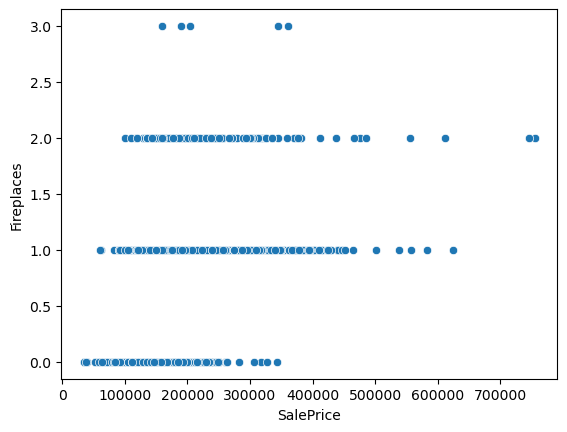

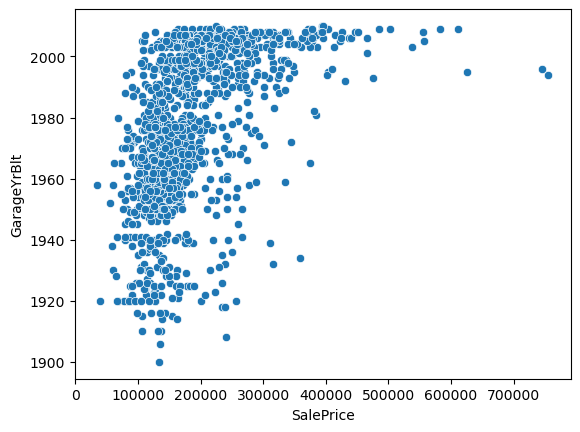

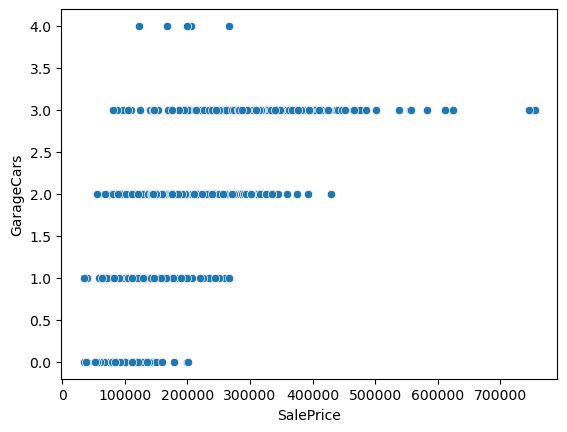

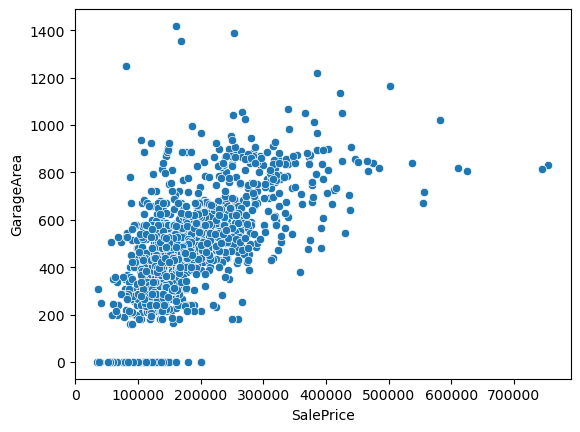

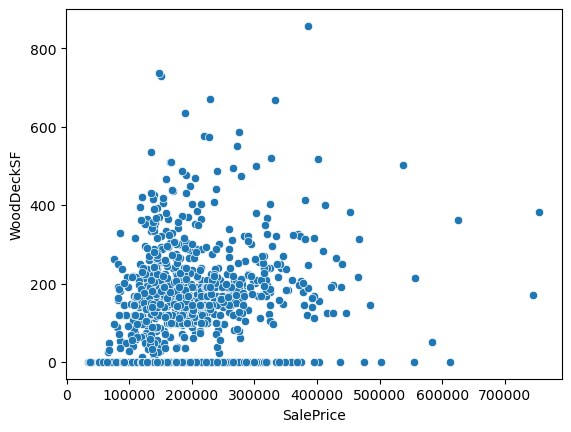

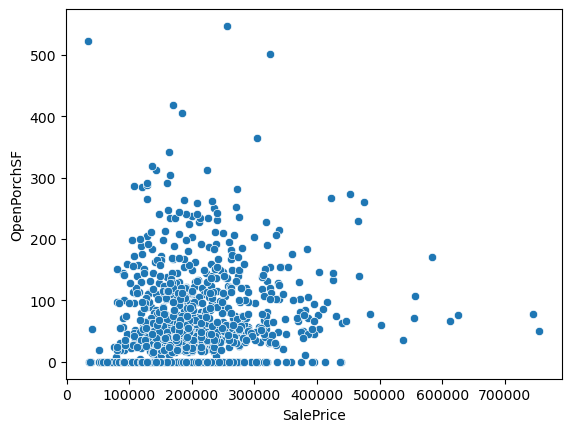

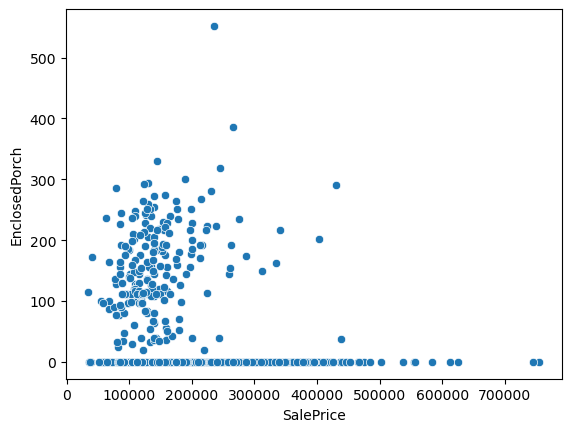

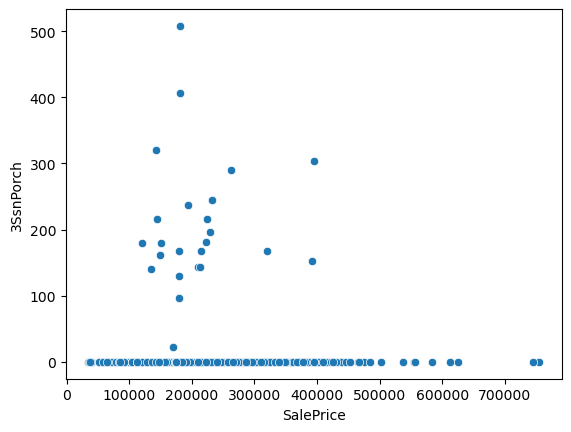

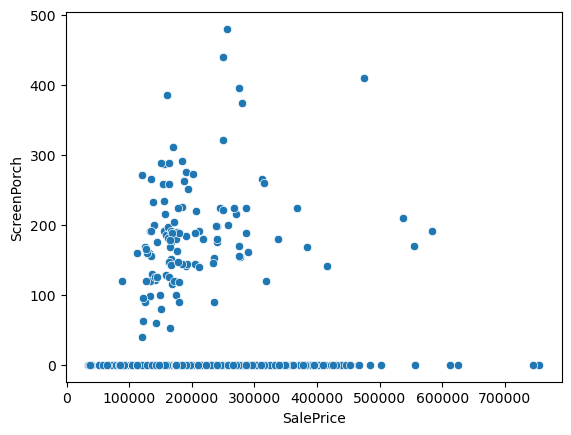

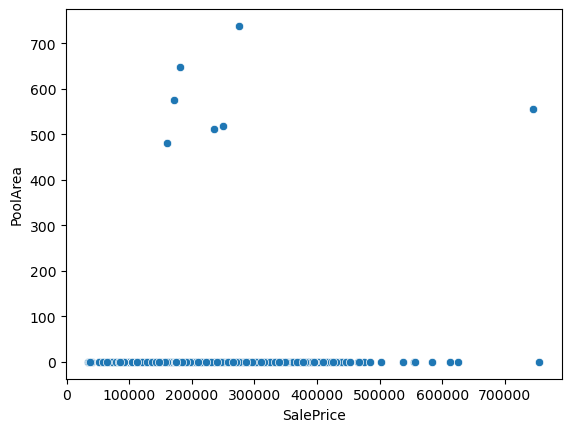

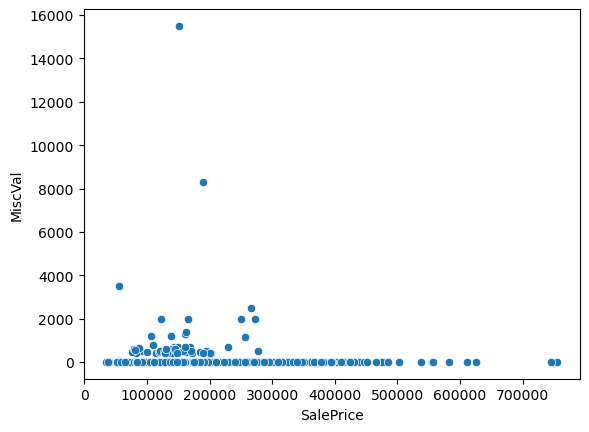

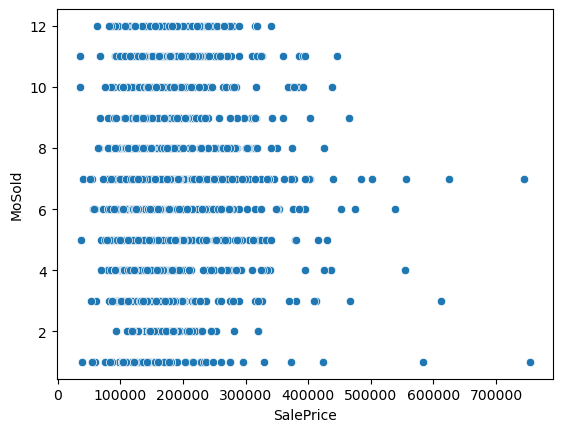

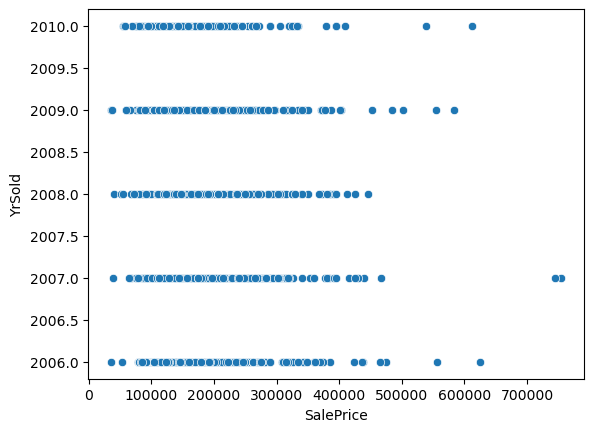

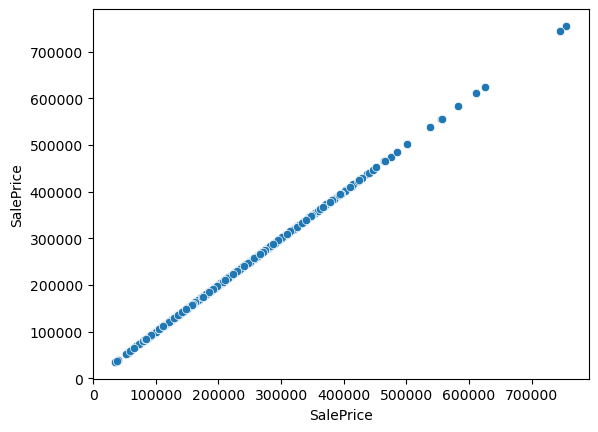

In [13]:
for col in df_train:
    if df_train[col].dtype != 'O':
        sns.scatterplot(x=df_train["SalePrice"], y=df_train[col])
        plt.show()

In [46]:
# Getting rid of outliers

df_train = df_train.drop(df_train[df_train["LotFrontage"]>250].index)
df_train = df_train.drop(df_train[df_train["LotArea"]>100000].index)
df_train = df_train.drop(df_train[df_train["BsmtFinSF1"]>5000].index)
df_train = df_train.drop(df_train[df_train["BsmtFinSF2"]>1400].index)
df_train = df_train.drop(df_train[df_train["TotalBsmtSF"]>6000].index)
df_train = df_train.drop(df_train[df_train["1stFlrSF"]>4000].index)
df_train = df_train.drop(df_train[df_train["GrLivArea"]>4500].index)

<Axes: >

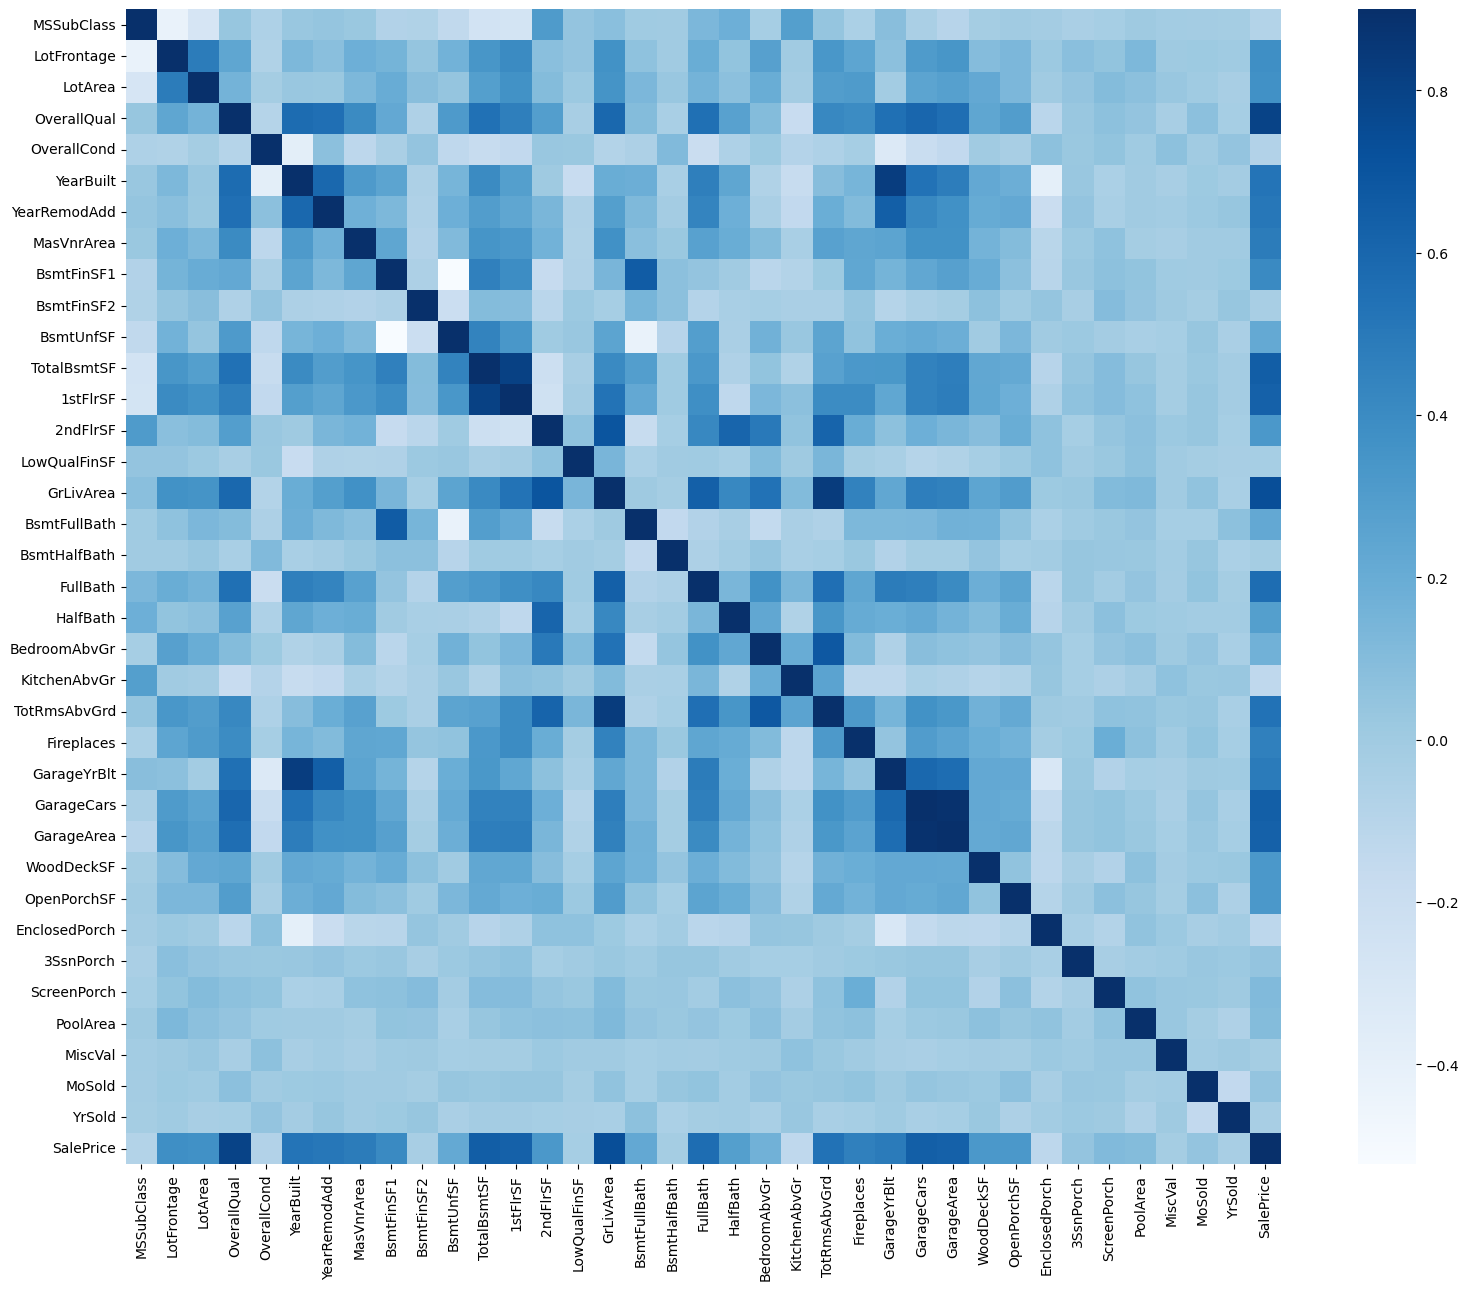

In [15]:
corr = df_train.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [47]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Density'>

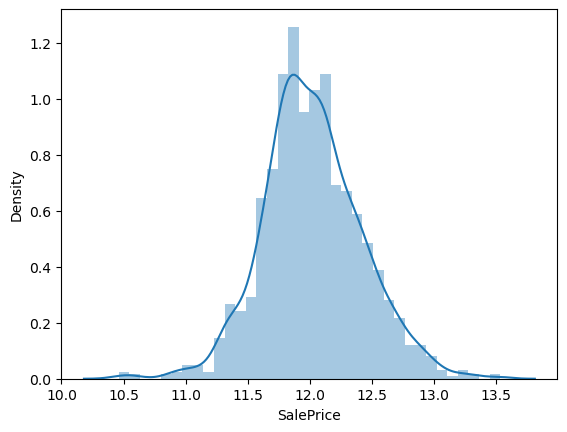

In [17]:
sns.distplot(df_train.SalePrice)

### Feature engineering

#### Filling missing values

In [18]:
for col in df_train:
    if df_train[col].isna().sum():
        print(col)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [19]:
for col in df_train:
    if df_train[col].isna().sum():
        print(df_train[col].mode())

0    60.0
Name: LotFrontage, dtype: float64
0    Grvl
Name: Alley, dtype: object
0    None
Name: MasVnrType, dtype: object
0    0.0
Name: MasVnrArea, dtype: float64
0    TA
Name: BsmtQual, dtype: object
0    TA
Name: BsmtCond, dtype: object
0    No
Name: BsmtExposure, dtype: object
0    Unf
Name: BsmtFinType1, dtype: object
0    Unf
Name: BsmtFinType2, dtype: object
0    SBrkr
Name: Electrical, dtype: object
0    Gd
Name: FireplaceQu, dtype: object
0    Attchd
Name: GarageType, dtype: object
0    2005.0
Name: GarageYrBlt, dtype: float64
0    Unf
Name: GarageFinish, dtype: object
0    TA
Name: GarageQual, dtype: object
0    TA
Name: GarageCond, dtype: object
0    Ex
1    Fa
2    Gd
Name: PoolQC, dtype: object
0    MnPrv
Name: Fence, dtype: object
0    Shed
Name: MiscFeature, dtype: object


In [48]:
def fill_na(df):
    for col in df:
        if df[col].isna().sum():
            df[col].fillna(df[col].mode()[0], inplace=True)
fill_na(df_train)
fill_na(df_test)

In [21]:
for col in df_train:
    if df_train[col].isna().sum():
        print(col)

In [22]:
df_train.head().T

,0,1,2,3,4
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


#### Create different features

In [49]:
def more_features(df):
    df["HasAlley"] = 1*(df["Alley"] != 'NA')
    df["HasBasement"] = 1*(df["BsmtExposure"] != 'NA')
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) +
                               df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
    df['Hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    df['HasOpenPorch'] = (df['OpenPorchSF'] == 0) * 1
    df['HasEnclosedPorch'] = (df['EnclosedPorch'] == 0) * 1
    df['Has3SsnPorch'] = (df['3SsnPorch'] == 0) * 1
    df['HasScreenPorch'] = (df['ScreenPorch'] == 0) * 1
    df["HasFence"] = 1*(df["Fence"] != 'NA')
    df['Haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
more_features(df_train)
more_features(df_test)

In [50]:
df_train.shape, df_test.shape

((1452, 91), (1459, 90))

#### get_dummies

In [51]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

df_train.shape, df_test.shape

((1452, 299), (1459, 281))

In [52]:
df_train, df_test = df_train.align(df_test, join='left', axis=1)

In [53]:
df_train.shape, df_test.shape

((1452, 299), (1459, 299))

In [55]:
df_test.drop("SalePrice", axis=1, inplace=True)

In [57]:
df_test.fillna(0, inplace=True)

### Modelling

In [26]:
X = df_train.drop("SalePrice", axis=1)
y = df_train.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_test.shape

(291, 298)

In [27]:
models = {
    'LinearRegression': LinearRegression(),
    'RandonForest': RandomForestRegressor(),
    'XGB': XGBRegressor(),
    'CatBoost': CatBoostRegressor(),
    'LGB': LGBMRegressor()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    scores = {}
    for label, model in models.items():
        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        scores[label] = np.sqrt(mean_squared_error(y_test, y_preds))
    return scores

fit_and_score(models, X_train, X_test, y_train, y_test)

Learning rate set to 0.04192
0:	learn: 0.3870635	total: 146ms	remaining: 2m 25s
1:	learn: 0.3764002	total: 148ms	remaining: 1m 13s
2:	learn: 0.3663508	total: 150ms	remaining: 49.8s
3:	learn: 0.3567527	total: 152ms	remaining: 37.8s
4:	learn: 0.3470868	total: 154ms	remaining: 30.6s
5:	learn: 0.3379090	total: 156ms	remaining: 25.8s
6:	learn: 0.3289488	total: 158ms	remaining: 22.4s
7:	learn: 0.3203918	total: 160ms	remaining: 19.8s
8:	learn: 0.3122212	total: 162ms	remaining: 17.8s
9:	learn: 0.3047946	total: 164ms	remaining: 16.2s
10:	learn: 0.2973985	total: 165ms	remaining: 14.9s
11:	learn: 0.2904323	total: 167ms	remaining: 13.8s
12:	learn: 0.2835162	total: 169ms	remaining: 12.9s
13:	learn: 0.2775269	total: 171ms	remaining: 12.1s
14:	learn: 0.2714460	total: 173ms	remaining: 11.4s
15:	learn: 0.2656239	total: 175ms	remaining: 10.8s
16:	learn: 0.2595896	total: 177ms	remaining: 10.2s
17:	learn: 0.2540350	total: 179ms	remaining: 9.76s
18:	learn: 0.2484028	total: 181ms	remaining: 9.35s
19:	learn:

{'LinearRegression': 0.13578168777394697,
 'RandonForest': 0.1422911151422968,
 'XGB': 0.147694988304752,
 'CatBoost': 0.1179522436679901,
 'LGB': 0.1312142704089133}

### Hyperparameter boosting for CatBoost

In [28]:
import optuna

def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = CatBoostRegressor(**params, silent=True)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    return rmse

In [29]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

[I 2024-09-17 15:56:54,526] A new study created in memory with name: no-name-caf37520-843d-4fc8-b551-7668e2c8a453
[I 2024-09-17 15:56:56,051] Trial 0 finished with value: 0.11861736965276325 and parameters: {'learning_rate': 0.06573584278546958, 'depth': 5, 'subsample': 0.35593782832075704, 'colsample_bylevel': 0.4094190842046157, 'min_data_in_leaf': 54}. Best is trial 0 with value: 0.11861736965276325.
[I 2024-09-17 15:56:57,343] Trial 1 finished with value: 0.11714773885993279 and parameters: {'learning_rate': 0.03162719015374698, 'depth': 5, 'subsample': 0.1412655232293479, 'colsample_bylevel': 0.1563952613296688, 'min_data_in_leaf': 32}. Best is trial 1 with value: 0.11714773885993279.
[I 2024-09-17 15:57:01,760] Trial 2 finished with value: 0.13564876676172744 and parameters: {'learning_rate': 0.005994702690395823, 'depth': 8, 'subsample': 0.32460275855034937, 'colsample_bylevel': 0.33255488132837724, 'min_data_in_leaf': 29}. Best is trial 1 with value: 0.11714773885993279.
[I 202

In [30]:
print('Best RMSE:', study.best_value)

Best RMSE: 0.1164900889580504


### Hyperparameter tuning for LightGB

In [31]:
def objective(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "n_estimators": 1000,
        "verbosity": -1,
        "bagging_freq": 1,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 2**10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }


    model = LGBMRegressor(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    return rmse

In [32]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=40)

[I 2024-09-17 16:01:29,041] A new study created in memory with name: no-name-35275caa-7ece-462c-bc24-fd341f654714
[I 2024-09-17 16:01:29,764] Trial 0 finished with value: 0.1320027548182834 and parameters: {'learning_rate': 0.07669761558285058, 'num_leaves': 386, 'subsample': 0.2282948834872468, 'colsample_bytree': 0.8928564127568689, 'min_data_in_leaf': 6}. Best is trial 0 with value: 0.1320027548182834.
[I 2024-09-17 16:01:30,059] Trial 1 finished with value: 0.14451850543839553 and parameters: {'learning_rate': 0.004191457931623556, 'num_leaves': 471, 'subsample': 0.3537326754657493, 'colsample_bytree': 0.23055654459164032, 'min_data_in_leaf': 30}. Best is trial 0 with value: 0.1320027548182834.
[I 2024-09-17 16:01:30,272] Trial 2 finished with value: 0.18986372046151542 and parameters: {'learning_rate': 0.0016459265696260805, 'num_leaves': 35, 'subsample': 0.8397094743255363, 'colsample_bytree': 0.9223605649137278, 'min_data_in_leaf': 82}. Best is trial 0 with value: 0.132002754818

In [33]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-09-17 16:02:00,233] A new study created in memory with name: no-name-84c04a1e-b587-4a5f-8e65-faf694f9dd09
[I 2024-09-17 16:02:00,734] Trial 0 finished with value: 0.1269402808315972 and parameters: {'learning_rate': 0.018406138055619043, 'num_leaves': 850, 'subsample': 0.8278794055341202, 'colsample_bytree': 0.9987752879396564, 'min_data_in_leaf': 37}. Best is trial 0 with value: 0.1269402808315972.
[I 2024-09-17 16:02:01,026] Trial 1 finished with value: 0.12762962997696328 and parameters: {'learning_rate': 0.050628869059067834, 'num_leaves': 1015, 'subsample': 0.34066021137233404, 'colsample_bytree': 0.46766716407887493, 'min_data_in_leaf': 36}. Best is trial 0 with value: 0.1269402808315972.
[I 2024-09-17 16:02:01,156] Trial 2 finished with value: 0.26680742908146465 and parameters: {'learning_rate': 0.0010163992992818693, 'num_leaves': 3, 'subsample': 0.27160544994708447, 'colsample_bytree': 0.41819365226487915, 'min_data_in_leaf': 43}. Best is trial 0 with value: 0.1269402

In [34]:
print('Best RMSE:', study.best_value)

Best RMSE: 0.11789360298987665


In [35]:
def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = CatBoostRegressor(**params, silent=True)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    return rmse
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2024-09-17 16:04:53,453] A new study created in memory with name: no-name-9fa5398f-85e7-498b-91b0-a9ef89ec5b7c
[I 2024-09-17 16:04:54,343] Trial 0 finished with value: 0.1918598143257621 and parameters: {'learning_rate': 0.002104837610716325, 'depth': 3, 'subsample': 0.5888619929159433, 'colsample_bylevel': 0.6641680436016684, 'min_data_in_leaf': 8}. Best is trial 0 with value: 0.1918598143257621.
[I 2024-09-17 16:05:35,304] Trial 1 finished with value: 0.20876697380049425 and parameters: {'learning_rate': 0.0016332230667512162, 'depth': 10, 'subsample': 0.21571273713158157, 'colsample_bylevel': 0.5286090816835592, 'min_data_in_leaf': 68}. Best is trial 0 with value: 0.1918598143257621.
[I 2024-09-17 16:05:37,405] Trial 2 finished with value: 0.11971024941343215 and parameters: {'learning_rate': 0.010381944349051932, 'depth': 6, 'subsample': 0.5370107581605373, 'colsample_bylevel': 0.43582083450520065, 'min_data_in_leaf': 43}. Best is trial 2 with value: 0.11971024941343215.
[I 2024

In [36]:
print('Best hyperparameters:', study.best_params)

Best hyperparameters: {'learning_rate': 0.07393089412116767, 'depth': 5, 'subsample': 0.8603735092627008, 'colsample_bylevel': 0.26672699819613377, 'min_data_in_leaf': 18}


In [39]:
model = CatBoostRegressor(**study.best_params)

In [58]:
model.fit(X_train, y_train)
y_preds = model.predict(df_test)

0:	learn: 0.3791683	total: 1.65ms	remaining: 1.65s
1:	learn: 0.3621125	total: 3.14ms	remaining: 1.57s
2:	learn: 0.3473820	total: 4.94ms	remaining: 1.64s
3:	learn: 0.3327376	total: 6.26ms	remaining: 1.56s
4:	learn: 0.3185141	total: 7.82ms	remaining: 1.56s
5:	learn: 0.3049281	total: 9.27ms	remaining: 1.53s
6:	learn: 0.2932706	total: 10.7ms	remaining: 1.52s
7:	learn: 0.2828366	total: 12.1ms	remaining: 1.5s
8:	learn: 0.2728191	total: 13.6ms	remaining: 1.49s
9:	learn: 0.2645015	total: 14.7ms	remaining: 1.46s
10:	learn: 0.2551915	total: 16.3ms	remaining: 1.47s
11:	learn: 0.2467756	total: 17.5ms	remaining: 1.44s
12:	learn: 0.2390850	total: 19.2ms	remaining: 1.46s
13:	learn: 0.2311577	total: 20.6ms	remaining: 1.45s
14:	learn: 0.2243421	total: 22.3ms	remaining: 1.47s
15:	learn: 0.2188224	total: 23.6ms	remaining: 1.45s
16:	learn: 0.2132291	total: 24.8ms	remaining: 1.44s
17:	learn: 0.2068191	total: 26.2ms	remaining: 1.43s
18:	learn: 0.2011453	total: 27.5ms	remaining: 1.42s
19:	learn: 0.1964575	to

In [61]:
submission_file = pd.read_csv("data/sample_submission.csv")
model_pred = np.expm1(y_preds)
submission_file["SalePrice"] = model_pred

submission_file.to_csv("submission.csv", index=False)